# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Problem Statement:

Leverage transaction, demographic, and offer data to predict how customers respond to each offers.

# Objective:

Identify demographic groups that respond best to each offer type.

# Metrics
In this project, we evaluate our models using metrics specifically chosen for their relevance to the classification problems at hand. The selection of appropriate metrics is crucial for assessing the model's performance accurately and ensuring that the results align with the project's objectives.

## 1.)Accuracy Score
The accuracy score represents the ratio of correctly predicted observations to the total observations. It is one of the most intuitive and straightforward metrics used in classification problems. Accuracy is particularly useful when the target classes are well balanced, meaning each class has a roughly equal number of instances.

### Justification: 
We chose the accuracy score as one of our metrics because it provides a quick and clear measure of how often our model is correct across both offer response classes (accepted and not accepted). In scenarios where the class distribution is relatively balanced, accuracy offers a solid first glance at the model's effectiveness.

## 2)F-score (F1 Score)
The F-score, or F1 score, is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful in situations where there is an imbalance between the classes, or when the cost of false positives and false negatives differs significantly.

   ### a)Precision 
It is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all offers predicted to be accepted, how many were actually accepted?"    

   ### b)Recall (Sensitivity)  
It measures the ratio of correctly predicted positive observations to all observations in the actual class. It answers: "Of all the offers that were actually accepted, how many did we correctly predict?"   

### Justification: 
The F-score provides a more nuanced view of model performance than accuracy alone, especially in our project where the precision of predictions (minimizing false positives) and recall (minimizing false negatives) are both critically important. By balancing these two aspects, the F-score helps us to ensure that our model does not disproportionately predict one class at the expense of the other, which is particularly valuable in our classification task where some types of errors may have a larger impact on the business outcome than others.

## Additional installations required for further steps:

In [2]:
!pip install --upgrade seaborn
!pip install --upgrade pip setuptools wheel
!pip install --upgrade scikit-learn
!pip install imbalanced-learn

##after installion, restart the kernal and rerun all to avoid package import errors

## Import required modules and reading the json files

In [3]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration

**Objectives**:
- Understand data distribution.
- Identify patterns and anomalies.

## A.) Porfolio Dataframe:

In [4]:
print(portfolio.shape)
portfolio.head(10)

(10, 6)


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [5]:
portfolio['id'].nunique() #number of unique offer id

10

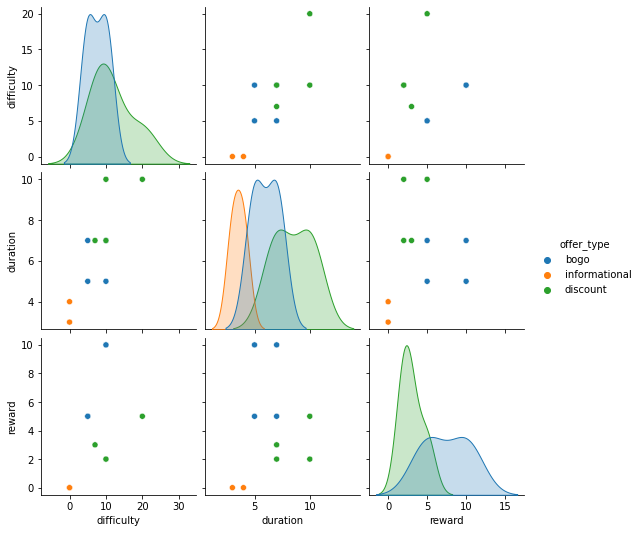

In [6]:
sns.pairplot(portfolio, hue='offer_type')

### Insights:  
- In Portfolio dataframe, we have all unique offer ids with 4 BOGO, 2 Informational, 4 Discount offers. Informational offer do not have reward and difficulty. BOGO offers have same value for reward and difficulty.   
- BOGO and discount offers tend to have a broader range of difficulty and reward levels, suggesting more variability in the potential investment and benefit associated with these offers.
- Informational offers are characterized by lower difficulty and reward values, indicating that they are likely to be less demanding and lucrative for customers.
- The plots do not show any apparent strong linear relationships between the variables, which suggests that each feature contributes independently to the definition of an offer type.
- The data points for the different offer types are quite distinct in terms of their distribution across the reward and difficulty axes, which can be useful in segmenting the offers into clear categories.

## B.) Profile Dataframe:

In [7]:
print(profile.shape)
profile.head()

(17000, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [8]:
profile.isna().sum() #NaN in each columns

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

Remove rows with 'NaN' in "income" column, linking to age=118 and gender=None in respective columns.
These rows do not have significance in the dataset we abide to prepare, since it onl have 'id' value and 'became_member_on' value which does not influence the demography of the customers. But only give total number of customers joined in those dates.

In [9]:
profile.dropna(subset=['income'], inplace=True) 
profile.isna().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

In [10]:
print(profile.shape)
profile['id'].nunique() #Check for unique customer ids

(14825, 5)


14825

In [11]:
profile[profile['age'] == 118]['age'].value_counts() #additional check to find the existence of 118 in 'age' column

Series([], Name: age, dtype: int64)

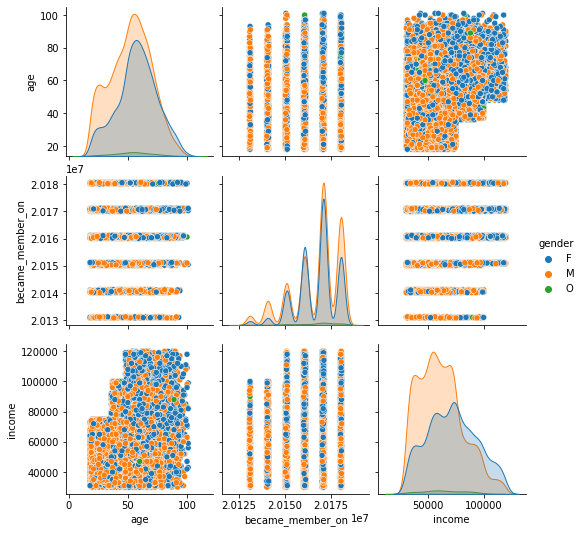

In [12]:
sns.pairplot(profile, hue='gender')

### Insights:  
- Age Distribution: There is a roughly similar distribution of age among all genders. The peak for males is slightly higher, suggesting a greater number of male customers in a certain age range.

- Membership Start Date: All genders show peaks in membership start dates around similar times, which might suggest periods of increased marketing or promotions that encouraged sign-ups.

- Income Distribution: Female customers appear to have a slightly higher income distribution compared to male customers, as seen by the density on the higher end of the income scale.

- Gender Scatter Distribution: Males are more prevalent at lower income levels, while females are more evenly distributed across the income spectrum.

- Age vs. Income: There doesn't seem to be a clear pattern indicating that age correlates with income across the different genders.

- Age vs. Membership Start Date: There's no discernible trend between age and when members joined, suggesting the appeal of the membership program across all age groups.

- Income vs. Membership Start Date: No clear relationship is observable between income levels and membership start dates.

## C.) Transcript Dataframe:

In [13]:
print(transcript.shape)
transcript.head()

(306534, 4)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [14]:
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [15]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [16]:
transcript['person'].value_counts() #repeated customer list in descending order

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
79d9d4f86aca4bed9290350fb43817c2    48
bd2cdd691aca4bb0a0e039979ee5de5c    46
b1f4ece7d49342628a9ed77aee2cde58    46
28681c16026943e68f26feaccab0907f    46
a42ed50acc4d4b25bca647c9e0b916ad    46
ab25fd6fbd5040f880751921e4029757    44
9ae56116908640fc83477982da0aaec4    43
d087fd0166404163b7d1e1e7cf2a9ac7    43
86e9d338b85b4177b369fe6b0ad4fed3    43
ca265792e65949d79b2b0e91bdd31c57    43
4142f5e23db741b1af4be0287dc91c1c    43
40ce078d5b2a43d19138a788754520be    42
8e7d398d4bd948e397e201ad2bd5cce8    42
cd9bac9e8aea4609929a55b9b468c88e    42
edc7b04392144da9979f3077095f268a    42
0ebc3c4c39234ab6a2701fe2525705a9    42
0d74b166a5e54b269795dbaf38c6dfae    42
417c8e42cba54dd0ba1ea7ee079ef87a    41
6cd32ababc644c6c8a2644368c795728    41
a6fce370a2ce4df995fc4899bfeb3b6a    41
81a263ee0b8544b6a8910ee690cc6edd    41
1d755c218f714559a57ee7df7

# Data Wrangling & Data Cleaning

## A.)Porfolio Dataframe

In [17]:
# Manual one-hot encoding of 'channels'
# Initialize columns for the channels with default value 0
for channel in ['web', 'email', 'mobile', 'social']:
    portfolio[channel] = 0

# Iterate through the DataFrame and set the channel columns
for index, row in portfolio.iterrows():
    for channel in row['channels']:
        portfolio.at[index, channel] = 1

# One-hot encode 'offer_type' using pd.get_dummies
offer_type_encoded = pd.get_dummies(portfolio['offer_type'], prefix='offer')

portfolio_copy = portfolio.copy()

# Drop the original 'channels' and 'offer_type' columns from portfolio_copy
portfolio_copy.drop(['channels','offer_type'], axis=1, inplace=True)

# Concatenate the one-hot encoded offer_type back to the original DataFrame
portfolio_encoded = pd.concat([portfolio_copy, offer_type_encoded], axis=1)

#Rename column name 'id' to 'refer_offer_id' for further analysis
portfolio_encoded.rename(columns={'id': 'refer_offer_id'}, inplace=True)

# Display the first few rows to verify changes
portfolio_encoded.head(10)

,difficulty,duration,refer_offer_id,reward,web,email,mobile,social,offer_bogo,offer_discount,offer_informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,0,1,1,1,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,1,0,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,1,0,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,1,0,0,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,0,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,1,0,0,1,0


## B.)Profile Dataframe

In [18]:
# Convert 'became_member_on' to datetime format
profile['year'] = profile.became_member_on.apply(lambda x: int(str(x)[:4]))
profile['month'] = profile.became_member_on.apply(lambda x: int(str(x)[4:6]))
profile['day'] = profile.became_member_on.apply(lambda x: int(str(x)[6:8]))
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Replace 'id' column name with 'person'
profile.rename(columns={'id': 'person'}, inplace=True)

# Encode 'gender'
# Create dummy variables for 'gender'
gender_encoded = pd.get_dummies(profile['gender'], prefix='gender')

# Concatenate encoded gender columns with the original DataFrame and drop the 'gender' column
profile = pd.concat([profile.drop('gender', axis=1), gender_encoded], axis=1)

# Display the first few rows to verify changes
profile.head(10)

,age,became_member_on,person,income,year,month,day,gender_F,gender_M,gender_O
1,55,2017-07-15,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,1,0,0
3,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,1,0,0
5,68,2018-04-26,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26,0,1,0
8,65,2018-02-09,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9,0,1,0
12,58,2017-11-11,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11,0,1,0
13,61,2017-09-11,aa4862eba776480b8bb9c68455b8c2e1,57000.0,2017,9,11,1,0,0
14,26,2014-02-13,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0,2014,2,13,0,1,0
15,62,2016-02-11,31dda685af34476cad5bc968bdb01c53,71000.0,2016,2,11,1,0,0
16,49,2014-11-13,62cf5e10845442329191fc246e7bcea3,52000.0,2014,11,13,0,1,0
18,57,2017-12-31,6445de3b47274c759400cd68131d91b4,42000.0,2017,12,31,0,1,0


In [19]:
profile[profile['gender_O']==1]['gender_O'].value_counts() #How many opted Other gender? 

1    212
Name: gender_O, dtype: int64

## C.)Transcript Dataframe

In [20]:
transcript_df = transcript.copy() # make a copy

# Expand the 'value' dictionary into separate columns
transcript_df = pd.concat([transcript_df.drop('value', axis=1), transcript_df['value'].apply(pd.Series)], axis=1)

# Convert 'time' from hours to days for easier interpretation
transcript_df['time'] /= 24

# Unify 'offer id' and 'offer_id' into a single column for consistency
transcript_df['refer_offer_id'] = transcript_df.apply(lambda row: row['offer_id'] if pd.notna(row['offer_id']) else row.get('offer id', None), axis=1)
transcript_df.drop(['offer id', 'offer_id'], axis=1, inplace=True, errors='ignore')

# Initialize columns for event types
transcript_df['transactions'] = 0
transcript_df['offers_received'] = 0
transcript_df['offers_viewed'] = 0
transcript_df['offers_completed'] = 0

# Mark the event type columns based on the 'event' column
transcript_df.loc[transcript_df['event'] == 'transaction', 'transactions'] = 1
transcript_df.loc[transcript_df['event'] == 'offer received', 'offers_received'] = 1
transcript_df.loc[transcript_df['event'] == 'offer viewed', 'offers_viewed'] = 1
transcript_df.loc[transcript_df['event'] == 'offer completed', 'offers_completed'] = 1

# Fill NaNs for 'amount' and 'reward' with 0
transcript_df['amount'] = transcript_df['amount'].fillna(0)
transcript_df['reward'] = transcript_df['reward'].fillna(0)

# Drop the original 'event' column if no longer needed
transcript_df.drop('event', axis=1, inplace=True)

# Example: Display the head of the modified DataFrame to verify
transcript_df.head()

,person,time,amount,reward,refer_offer_id,transactions,offers_received,offers_viewed,offers_completed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0.0,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0.0,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0.0,0.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0


# Data Visualization

## A.)Portfolio Dataframe

we will create:

 1. A histogram of the difficulties for each offer.  
 2. A histogram of the reward for each offer.  
 3. A bar plot showing the duration of each offer.  
 4. A count plot for each communication channel (web, email, mobile, social).  
 5. A pie chart displaying the distribution of offer types (offer_bogo, offer_discount, offer_informational).

[8, 10, 9, 6]


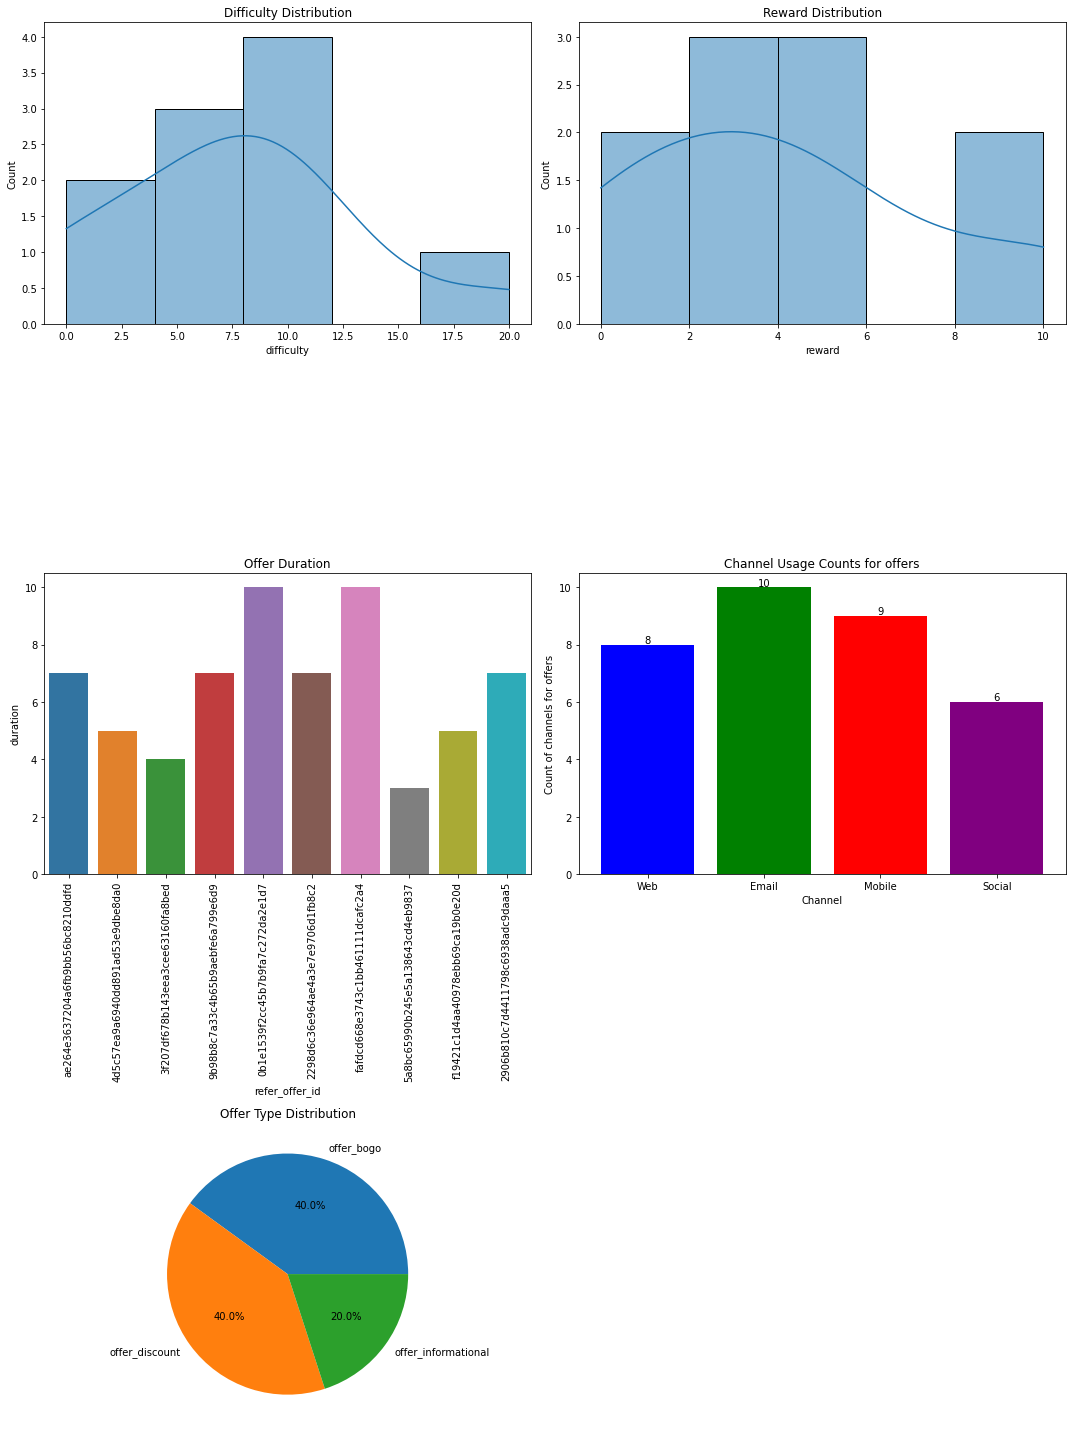

In [21]:
# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
fig.delaxes(axs[2,1]) # Hides the subplot at 3rd row, 2nd column

# Histogram for difficulty and reward
sns.histplot(data=portfolio_encoded, x="difficulty", kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Difficulty Distribution')
sns.histplot(data=portfolio_encoded, x="reward", kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Reward Distribution')

# Bar plot for durations
sns.barplot(data=portfolio_encoded, x="refer_offer_id", y="duration", ax=axs[1, 0])
axs[1, 0].set_title('Offer Duration')
axs[1, 0].tick_params(axis='x', rotation=90)

## Count plots for communication channels
# Calculate the counts of 1's for each channel
web_count = portfolio_encoded['web'].sum()
email_count = portfolio_encoded['email'].sum()
mobile_count = portfolio_encoded['mobile'].sum()
social_count = portfolio_encoded['social'].sum()

# Channels and their corresponding counts
channels = ['Web', 'Email', 'Mobile', 'Social']
counts = [web_count, email_count, mobile_count, social_count]
print(counts)

# Plotting in the specified subplot (2, 0)
ax = axs[1, 1]  # Third row, first column
ax.bar(channels, counts, color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels to the specified subplot
ax.set_title('Channel Usage Counts for offers')
ax.set_xlabel('Channel')
ax.set_ylabel('Count of channels for offers')

# Displaying the actual counts above the bars in the specified subplot
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center')

# Pie charts for offer types
offer_types = portfolio_encoded[['offer_bogo', 'offer_discount', 'offer_informational']].sum()
axs[2, 0].pie(offer_types, labels=offer_types.index, autopct='%1.1f%%')
axs[2, 0].set_title('Offer Type Distribution')

plt.tight_layout()
plt.show()

## Insights:

1. Difficulty Distribution:   
  - This histogram shows the distribution of the "difficulty" level of certain tasks or offers.
  - The plot suggests that the majority of tasks/offers are of low to moderate difficulty, with very few at the high difficulty level of 20.
  - The mean difficulty level looks to be slightly under 7.5 based on the trend line.      


2. Reward Distribution:  
  - This histogram displays the distribution of "rewards" associated with tasks or offers.
  - The distribution seems skewed to the left, indicating that most tasks or offers have lower reward values.
  - A significant number of rewards are at the 0 level, and very few offer a reward of 10, the maximum shown.    


3. Offer Duration:  
  - This bar chart presents the duration of various offers, each represented by a unique offer ID.
  - The durations vary across offers, with some lasting as long as around 10 days, while others are just above 5 days.
  - The most common durations appear to be around 7 days and just above 5 days.    
 
 
4. Channel Usage Counts for Offers:  
  - This bar chart shows the frequency of use of different marketing channels for offers.
  - The channels include Web, Email, Mobile, and Social.
  - Email and Mobile are the most frequently used channels (each with a count of 9), followed by Web and Social.     


5. Offer Type Distribution:  
  - This pie chart provides the percentage distribution of different types of offers.
  - There are three offer types: bogo (buy one get one free), discount, and informational.
  - Both bogo and discount types constitute 40% each, and informational offers represent 20% of the total.

## B.)Profile Dataframe

1. Age Distribution: Visualize the distribution of ages to understand the demographics of your user base.   
2. Membership Start Date: Analyze how long users have been members and visualize membership start dates over time.
3. Income Distribution: Examine the distribution of income across your user base.
4. Gender Distribution: Create a visualization to show the distribution of genders.
5. Customer Subsciption: Visualize the distribution of customer subcriptions by Month and Year.

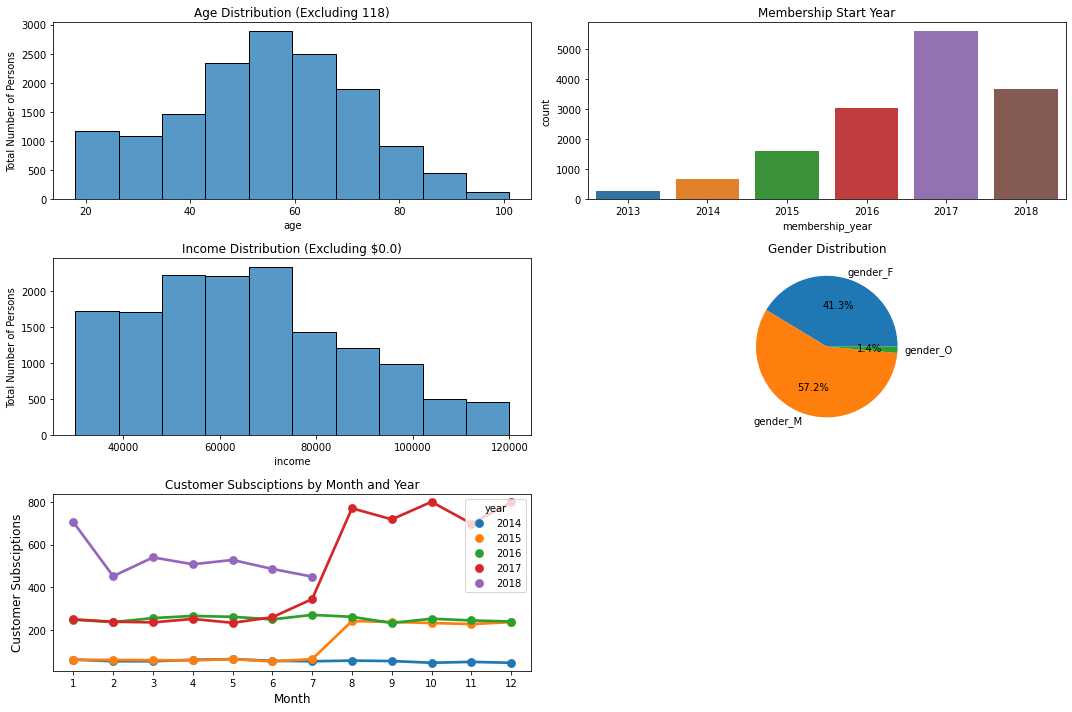

In [22]:
# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.delaxes(axs[2,1]) # Hides the subplot at 3rd row, 2nd column

# Age Distribution (excluding placeholder value of 118)
sns.histplot(profile[profile['age'] < 118]['age'], bins=10, kde=False, stat='count', ax=axs[0,0])
axs[0,0].set_title('Age Distribution (Excluding 118)')
axs[0,0].set_ylabel('Total Number of Persons')

# Membership Start Date
profile['membership_year'] = profile['became_member_on'].dt.year
sns.countplot(data=profile, x='membership_year', ax=axs[0, 1])
axs[0, 1].set_title('Membership Start Year')

# Income Distribution (excluding $0.0)
sns.histplot(profile[profile['income'] > 0]['income'], bins=10, kde=False, stat='count', ax=axs[1,0])
axs[1,0].set_title('Income Distribution (Excluding $0.0)')
axs[1,0].set_ylabel('Total Number of Persons')

# Gender Distribution
gender_cols = ['gender_F', 'gender_M', 'gender_O']
gender_counts = profile[gender_cols].sum()
axs[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title('Gender Distribution')

# Plotting Customer Subsciptions by Month and Year
membership_subscription = profile[profile['year'] >= 2014].groupby(['year','month'], as_index=False).agg({'person':'count'})
sns.pointplot(x="month", y="person", hue="year", data = membership_subscription)
axs[2, 0].set_ylabel('Customer Subsciptions', fontsize = 12)
axs[2, 0].set_xlabel('Month', fontsize = 12)
axs[2, 0].set_title('Customer Subsciptions by Month and Year')

plt.tight_layout()
plt.show()

## Insights:

1. Age Distribution:
  - The histogram displays the distribution of customer ages, excluding the outlier age of 118.
  - The most common age range is between 50 and 60 years old.
  - The number of customers gradually decreases after the age of 60.


2. Income Distribution:

  - This histogram shows the distribution of customer income, excluding the income value of $0.0.  
  
  - The highest frequency of income is between $ 60,000  and $ 80,000.
  
  - The number of customers seems to decrease as income increases, particularly after $80,000.


3. Membership Start Year:
  - The bar chart indicates the number of customer memberships started in each year from 2013 to 2018.
  - Membership counts have been increasing over the years, with the highest number starting in 2017.
  - There is a slight decrease in new memberships in 2018 compared to 2017.


4. Gender Distribution:
  - The pie chart illustrates the distribution of customers by gender.
  - The majority of customers are male (57.2%).
  - Females represent 41.3% of customers, and there is a small portion (1.4%) of customers with gender unspecified (gender_O).


5. Customer Subscriptions by Month and Year:
  - This line graph shows the trend of customer subscriptions by month for different years from 2014 to 2018.
  - There is a clear peak in subscriptions around the 7th month (July) for the years 2017 and 2018.
  - The number of subscriptions in the first months of 2018 is higher than in the same months of previous years, indicating growth over time.

## C.)Transcript Dataframe

### 1. Offers Received, Viewed, and Completed Analysis
we can analyze the funnel of how many offers are received, viewed, and completed. This helps in understanding the conversion rate at each stage.
Analysis for each stage of the offer lifecycle, focusing on the conversion rate from offers received to offers viewed to offers completed:

Total Offers Received: 76277
Total Offers Viewed: 57725
Total Offers Completed: 33579
Conversion Rate (Received to Viewed): 75.68%
Conversion Rate (Received to Completed): 44.02%
Conversion Rate (Viewed to Completed): 58.17%


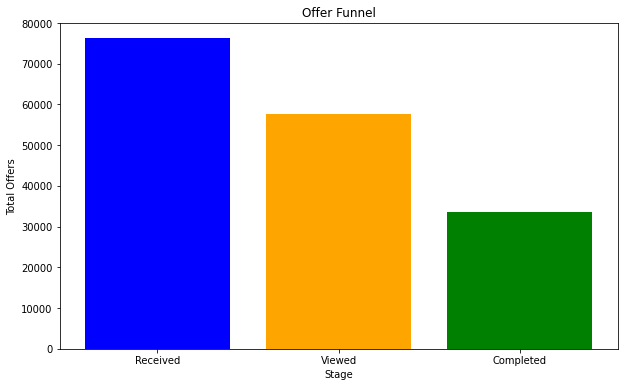

In [23]:
# Analysis of Funnel Conversion Rates
total_offers_received = transcript_df['offers_received'].sum()
total_offers_viewed = transcript_df['offers_viewed'].sum()
total_offers_completed = transcript_df['offers_completed'].sum()

print(f"Total Offers Received: {total_offers_received}")
print(f"Total Offers Viewed: {total_offers_viewed}")
print(f"Total Offers Completed: {total_offers_completed}")

# Calculate conversion rates
conversion_rate_viewed = total_offers_viewed / total_offers_received
conversion_rate_completed = total_offers_completed / total_offers_received
conversion_rate_viewed_to_completed = total_offers_completed / total_offers_viewed

print(f"Conversion Rate (Received to Viewed): {conversion_rate_viewed:.2%}")
print(f"Conversion Rate (Received to Completed): {conversion_rate_completed:.2%}")
print(f"Conversion Rate (Viewed to Completed): {conversion_rate_viewed_to_completed:.2%}")

# Visualization of the Funnel
stages = ['Received', 'Viewed', 'Completed']
values = [total_offers_received, total_offers_viewed, total_offers_completed]

plt.figure(figsize=(10, 6))
plt.bar(stages, values, color=['blue', 'orange', 'green'])
plt.title('Offer Funnel')
plt.xlabel('Stage')
plt.ylabel('Total Offers')
plt.show()

## Insights:

1. Drop-off at Each Stage:
 - There is a noticeable drop-off in numbers from the Received to the Viewed stage, and again from the Viewed to the Completed stage. This indicates that not all offers that are received are engaged with, and not all that are viewed are acted upon.


2. Conversion Rates:
 - The conversion rate from Received to Viewed is 75.68%, meaning that a majority of the received offers are at least viewed by the customers.
 - The conversion rate from Received to Completed is substantially lower at 44.02%, suggesting that less than half of the offers received are completed by customers.
 - The conversion rate from Viewed to Completed is 58.17%, which shows that once an offer is viewed, it has a relatively higher chance of being completed, but still, a significant portion of viewed offers are not completed.


3. Marketing Efficiency:
 - The data suggests that while there is a reasonable level of initial engagement (viewing), there is room for improvement in converting viewed offers into completed actions.
 - Strategies could be implemented to increase the completion rate of viewed offers, potentially by making the offers more compelling or by targeting the right demographic more accurately.

The funnel analysis indicates that the marketing campaign is capable of generating interest (as seen in the number of offers viewed), but there is potential to improve the effectiveness of the campaign in terms of completion rates.

### 2. Time Analysis
Examine how the timing of each event (offers received, viewed, and completed) influences the likelihood of completion. This can involve comparing the time stamps of each event to see if quicker views lead to higher completion rates.

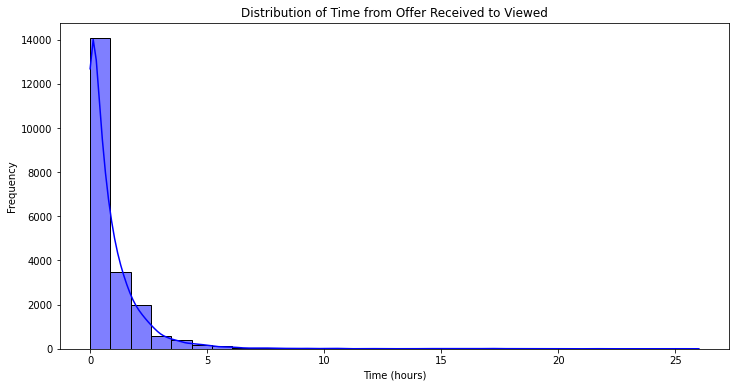

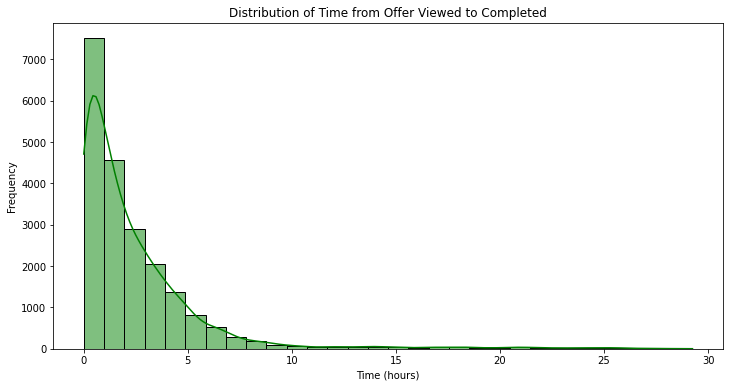

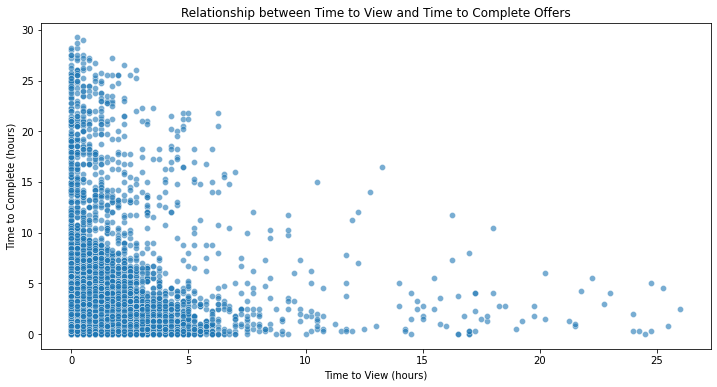

In [24]:
# Separate DataFrames for received, viewed, and completed offers
df_received = transcript_df[transcript_df['offers_received'] == 1]
df_viewed = transcript_df[transcript_df['offers_viewed'] == 1]
df_completed = transcript_df[transcript_df['offers_completed'] == 1]

# Calculate the earliest time each offer was viewed and completed after being received, by person and offer ID
viewed_times = df_viewed.groupby(['person', 'refer_offer_id'])['time'].min().reset_index().rename(columns={'time': 'time_viewed'})
completed_times = df_completed.groupby(['person', 'refer_offer_id'])['time'].min().reset_index().rename(columns={'time': 'time_completed'})

# Merge the times back with the received offers
merged = pd.merge(df_received, viewed_times, on=['person', 'refer_offer_id'], how='left')
merged = pd.merge(merged, completed_times, on=['person', 'refer_offer_id'], how='left')

# Calculate time to view and time to complete
merged['time_to_view'] = merged['time_viewed'] - merged['time']
merged['time_to_complete'] = merged['time_completed'] - merged['time_viewed']

# Filter to ensure logical sequence of events
merged = merged[(merged['time_to_view'] >= 0) & (merged['time_to_complete'] >= 0)]

# Time to View Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged['time_to_view'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Time from Offer Received to Viewed')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Time to Complete Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged['time_to_complete'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Time from Offer Viewed to Completed')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Analyzing the relationship between viewing and completion times
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged, x='time_to_view', y='time_to_complete', alpha=0.6)
plt.title('Relationship between Time to View and Time to Complete Offers')
plt.xlabel('Time to View (hours)')
plt.ylabel('Time to Complete (hours)')
plt.show()

## Insights:
1. Distribution of Time from Offer Received to Viewed (Histogram):
 - This histogram shows that most offers are viewed soon after being received, with a sharp decrease in frequency after the first few hours.
 - The shape of this distribution is very steep, which indicates that the time between receiving and viewing an offer is generally very short.


2. Distribution of Time from Offer Viewed to Completed (Histogram):
 - The histogram displays a right-skewed distribution indicating that a large number of offers are completed shortly after they are viewed.
 - Similar to the first distribution, there is a significant drop in frequency as time increases, meaning fewer offers are completed as more time passes after they have been viewed.


3. Relationship between Time to View and Time to Complete Offers (Scatter Plot):
 - This scatter plot shows that most offers are both viewed and completed in the initial few hours after being received.
 - There is a dense cluster of points close to the origin, indicating that quicker views correlate with quicker completions.
 - As time to view increases, time to complete also tends to increase, suggesting a direct relationship between the speed of viewing and completing an offer.


**Simple Inference Across All Plots**:
 - There is a strong tendency for offers to be viewed and completed shortly after being received.
 - The likelihood of an offer being completed decreases as the time taken to view the offer increases.
 - Marketers could focus on strategies that prompt immediate viewing and completion of offers, such as sending offers at times when customers are most likely to be attentive or making the initial engagement as frictionless as possible.


# Methodology:

## 1. Data Preprocessing

Prepare the data for analysis.

In [25]:
# Step 1: Merge offers_completed with portfolio_encoded on 'refer_offer_id'
merged_offers = pd.merge(transcript_df, portfolio_encoded, how='left', on='refer_offer_id')

# Step 2: Merge the result with profile on 'person'
final_offer = pd.merge(merged_offers, profile, how='left', on='person')

final_offer= final_offer.rename(columns={'reward_y': 'reward','time_completed': 'time'})
final_offer.drop(['reward_x','became_member_on','membership_year'], axis=1, inplace=True, errors='ignore')

data = final_offer.copy()
data.head(15)

,person,time,amount,refer_offer_id,transactions,offers_received,offers_viewed,offers_completed,difficulty,duration,...,offer_discount,offer_informational,age,income,year,month,day,gender_F,gender_M,gender_O
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,5.0,7.0,...,0.0,0.0,75.0,100000.0,2017.0,5.0,9.0,1.0,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,20.0,10.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0.0,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,10.0,7.0,...,1.0,0.0,68.0,70000.0,2018.0,4.0,26.0,0.0,1.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,10.0,10.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0.0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0,10.0,5.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,389bc3fa690240e798340f5a15918d5c,0.0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,5.0,5.0,...,0.0,0.0,65.0,53000.0,2018.0,2.0,9.0,0.0,1.0,0.0
6,c4863c7985cf408faee930f111475da3,0.0,0.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,0,7.0,7.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,0.0,0.0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,0.0,4.0,...,0.0,1.0,58.0,51000.0,2017.0,11.0,11.0,0.0,1.0,0.0
8,aa4862eba776480b8bb9c68455b8c2e1,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,20.0,10.0,...,1.0,0.0,61.0,57000.0,2017.0,9.0,11.0,1.0,0.0,0.0
9,31dda685af34476cad5bc968bdb01c53,0.0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,20.0,10.0,...,1.0,0.0,62.0,71000.0,2016.0,2.0,11.0,1.0,0.0,0.0


In [26]:
print(data.shape)
data.columns

(306534, 26)


Index(['person', 'time', 'amount', 'refer_offer_id', 'transactions',
       'offers_received', 'offers_viewed', 'offers_completed', 'difficulty',
       'duration', 'reward', 'web', 'email', 'mobile', 'social', 'offer_bogo',
       'offer_discount', 'offer_informational', 'age', 'income', 'year',
       'month', 'day', 'gender_F', 'gender_M', 'gender_O'],
      dtype='object')

In [27]:
data.isna().sum()

person                      0
time                        0
amount                      0
refer_offer_id         138953
transactions                0
offers_received             0
offers_viewed               0
offers_completed            0
difficulty             138953
duration               138953
reward                 138953
web                    138953
email                  138953
mobile                 138953
social                 138953
offer_bogo             138953
offer_discount         138953
offer_informational    138953
age                     33772
income                  33772
year                    33772
month                   33772
day                     33772
gender_F                33772
gender_M                33772
gender_O                33772
dtype: int64

In [28]:
data.fillna(0, inplace=True)

In [29]:
data.isna().sum()

person                 0
time                   0
amount                 0
refer_offer_id         0
transactions           0
offers_received        0
offers_viewed          0
offers_completed       0
difficulty             0
duration               0
reward                 0
web                    0
email                  0
mobile                 0
social                 0
offer_bogo             0
offer_discount         0
offer_informational    0
age                    0
income                 0
year                   0
month                  0
day                    0
gender_F               0
gender_M               0
gender_O               0
dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


         Male_amount  Female_amount       Male_age     Female_age  \
count  155690.000000  113101.000000  155690.000000  113101.000000   
mean        5.426751       7.636493      51.730580      56.735564   
std        20.634645      24.912279      17.509817      17.240858   
min         0.000000       0.000000      18.000000      18.000000   
25%         0.000000       0.000000      39.000000      46.000000   
50%         0.000000       0.000000      53.000000      57.000000   
75%         6.110000      13.150000      64.000000      68.000000   
max       977.780000    1062.280000     100.000000     101.000000   

         Male_income  Female_income  
count  155690.000000  113101.000000  
mean    60589.087289   69546.750250  
std     19776.658413   22153.415342  
min     30000.000000   30000.000000  
25%     45000.000000   53000.000000  
50%     58000.000000   69000.000000  
75%     72000.000000   86000.000000  
max    120000.000000  120000.000000  


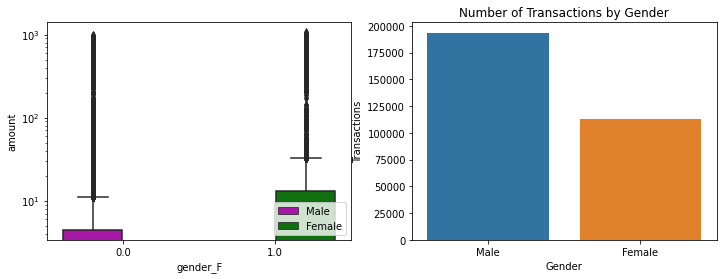

In [30]:
plt.rcParams["figure.figsize"] = (12,4)
fig, (ax1, ax2) = plt.subplots(ncols = 2)

# plotting a Box Plot of amounts by gender
g = sns.boxplot(x="gender_F", y="amount",
            hue="gender_F", palette=["m", "g"],
            data=data, ax=ax1)

# set a log Y scale
g.set_yscale('log')
g.legend().set_title('Gender')
for t, l in zip(g.legend().texts, ['Male', 'Female']): t.set_text(l)

# plot title and axis
plt.title('Amount spent on transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.xticks([[]])

# plotting a Bar Plot of number of transactions by gender
h = sns.countplot(data['gender_F'], ax=ax2)

# plot title and axis
plt.title('Number of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Transactions')

plt.xticks([0, 1], ['Male', 'Female'])

# Create a new DataFrame of stat details on required attributes
description_columns = ['amount', 'age', 'income']
description_labels = [cat + '_' + gen for cat in ['Male', 'Female'] for gen in description_columns]
reorder_columns = [gen + '_' + cat for cat in description_columns for gen in ['Male', 'Female']]

# separate into male and female dataframes
transaction_data_f = data[data.gender_F == 1]
transaction_data_m = data[data.gender_M == 1]

# Separate into stats from Female and Male transactions
description = pd.concat([transaction_data_m[['amount', 'age', 'income']].describe(), 
           transaction_data_f[['amount', 'age', 'income']].describe()], axis=1);
description.columns = description_labels;
print(description[reorder_columns])
plt.show()

## Insights:

### From the graphs:

 - The left graph is a boxplot comparing the amount of transactions by gender. It uses a logarithmic scale for the amount, suggesting a wide range of transaction amounts, probably with many outliers. The green box representing males and the purple representing females show that the median (50th percentile) amount is at 0 for both genders, indicating that at least half of the people from both genders have a transaction amount of 0. However, it's worth noting that the spread (range from 25th to 75th percentile) and outliers are not clear due to the logarithmic scale and whisker representation.
 - The right graph is a bar chart titled "Number of Transactions by Gender". It shows that males have more transactions than females, with males having approximately 200,000 transactions and females having about 150,000.
 
### From the statistical summary:

 - There are more male transactions (155,690) than female transactions (113,101).
 - On average, females have higher transaction amounts (mean of 7.64) compared to males (mean of 5.43).
 - Males are slightly younger (mean age of 51.73) than females (mean age of 56.74).
 - Females have a higher average income (mean of 69,546) compared to males (mean of 60,589). 

### From combined information:
 - Although men conduct more transactions, women on average transact higher amounts.
 - Women are typically older and have higher incomes than men in this dataset.
 - A significant proportion of transactions for both genders have an amount of 0, indicating no money was transacted or possibly missing data.
 - The transaction data is likely skewed with some very high values, given the need for a logarithmic scale on the boxplot.


In [31]:
# Display the first row
print(data.iloc[0])

person                 78afa995795e4d85b5d9ceeca43f5fef
time                                                  0
amount                                                0
refer_offer_id         9b98b8c7a33c4b65b9aebfe6a799e6d9
transactions                                          0
offers_received                                       1
offers_viewed                                         0
offers_completed                                      0
difficulty                                            5
duration                                              7
reward                                                5
web                                                   1
email                                                 1
mobile                                                1
social                                                0
offer_bogo                                            1
offer_discount                                        0
offer_informational                             

# 2. Implementation

We dig deep to classify and segregate the demography of the customers for each offer type.

First we analyse customers who completed BOGO offer, then analyse female and male customers separately within this dataset.  
Similarly, we do the same for Discount offer and Informational offer.

## A.) Offer - BOGO

  - ## I.) Generic customers:

In [32]:
# Filter the DataFrame for rows where offer_bogo is 1
bogo_df = data[data['offer_bogo'] == 1].copy()

bogo_df.drop(['became_member_on','membership_year',], axis=1, inplace=True, errors='ignore')

print('\nSum of reward credited through BOGO = ',bogo_df['reward'].sum()) 
print("\nTotal Male customers availed BOGO offer = ",bogo_df[bogo_df['gender_M']==1]['gender_M'].sum())
print("\nTotal Female customers availed BOGO offer = ",bogo_df[bogo_df['gender_F']==1]['gender_F'].sum())
print("\nTotal customers with other gender availed BOGO offer = ",bogo_df[bogo_df['gender_O']==1]['gender_O'].sum())
print("\nIn successful year 2017, total customers availed BOGO offer: ",bogo_df[bogo_df['year']==2017]['year'].value_counts()) 


Sum of reward credited through BOGO =  539505.0

Total Male customers availed BOGO offer =  35301.0

Total Female customers availed BOGO offer =  27619.0

Total customers with other gender availed BOGO offer =  914.0

In successful year 2017, total customers availed BOGO offer:  2017.0    24316
Name: year, dtype: int64


In [33]:
bogo_df.describe()

,time,amount,transactions,offers_received,offers_viewed,offers_completed,difficulty,duration,reward,web,...,offer_discount,offer_informational,age,income,year,month,day,gender_F,gender_M,gender_O
count,71617.000000,71617.0,71617.0,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,...,71617.0,71617.0,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000,71617.000000
mean,14.722039,0.0,0.0,0.425863,0.355349,0.218789,7.533197,5.956868,7.533197,0.747797,...,0.0,0.0,48.814499,59337.657260,1797.423978,5.977505,14.174414,0.385649,0.492914,0.012762
std,8.238069,0.0,0.0,0.494477,0.478622,0.413428,2.499797,0.999076,2.499797,0.434280,...,0.0,0.0,23.551018,29100.774887,627.627161,3.907736,9.619048,0.486752,0.499953,0.112248
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,0.0,0.0,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,...,0.0,0.0,36.000000,43000.000000,2015.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,17.000000,0.0,0.0,0.000000,0.000000,0.000000,10.000000,5.000000,10.000000,1.000000,...,0.0,0.0,53.000000,61000.000000,2017.000000,6.000000,14.000000,0.000000,0.000000,0.000000
75%,21.250000,0.0,0.0,1.000000,1.000000,0.000000,10.000000,7.000000,10.000000,1.000000,...,0.0,0.0,65.000000,79000.000000,2017.000000,9.000000,23.000000,1.000000,1.000000,0.000000
max,29.750000,0.0,0.0,1.000000,1.000000,1.000000,10.000000,7.000000,10.000000,1.000000,...,0.0,0.0,101.000000,120000.000000,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000


In [34]:
bogo_df.columns

Index(['person', 'time', 'amount', 'refer_offer_id', 'transactions',
       'offers_received', 'offers_viewed', 'offers_completed', 'difficulty',
       'duration', 'reward', 'web', 'email', 'mobile', 'social', 'offer_bogo',
       'offer_discount', 'offer_informational', 'age', 'income', 'year',
       'month', 'day', 'gender_F', 'gender_M', 'gender_O'],
      dtype='object')

Female customers who completed BOGO offer:  7501.0
Male customers who completed BOGO offer:  7512.0


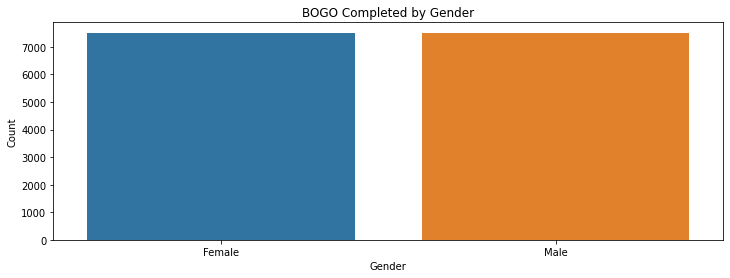

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


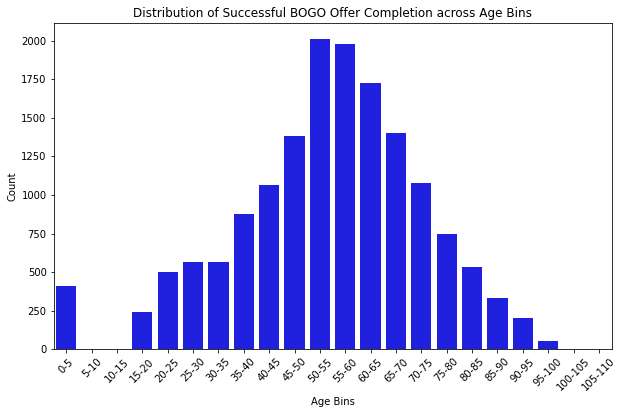

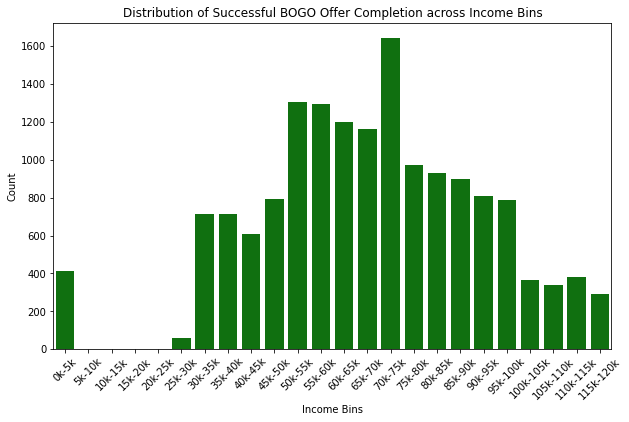

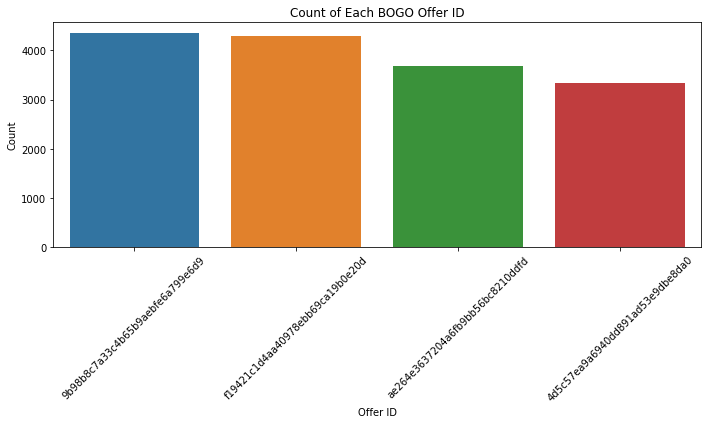

Count of Each BOGO Offer ID:
                      refer_offer_id  count
0  9b98b8c7a33c4b65b9aebfe6a799e6d9   4354
1  f19421c1d4aa40978ebb69ca19b0e20d   4296
2  ae264e3637204a6fb9bb56bc8210ddfd   3688
3  4d5c57ea9a6940dd891ad53e9dbe8da0   3331


In [35]:
# Filter the DataFrame for offer_completed = 1
bogo_completed_df = bogo_df[bogo_df['offers_completed'] == 1]

# Female customers who completed BOGO
fem_bogo_completed = (bogo_completed_df[bogo_completed_df['gender_F'] == 1])['gender_F'].sum()

# male customers who completed BOGO
mal_bogo_completed = (bogo_completed_df[bogo_completed_df['gender_M'] == 1])['gender_M'].sum()

print("Female customers who completed BOGO offer: ",fem_bogo_completed)
print("Male customers who completed BOGO offer: ",mal_bogo_completed)

genders = ['Female', 'Male']
counts = [fem_bogo_completed, mal_bogo_completed]

#Plot Gender count as Female Vs Male
sns.barplot(x=genders, y=counts)
plt.title('BOGO Completed by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# Now, plotting the distribution of successful BOGO offer completion across age bins
age_bins = np.linspace(0, 110, 23)  # 22 bins from 0 to 110 with intervals of 5
bogo_completed_df['age_binned'] = pd.cut(
    bogo_completed_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=bogo_completed_df, color='blue')
plt.title('Distribution of Successful BOGO Offer Completion across Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# plotting the distribution of successful BOGO offer completion across Income Bins
income_bins = np.linspace(0, 120000, 25)  # 24 bins from 0 to 120k with intervals of 5k
bogo_completed_df['income_binned'] = pd.cut(
    bogo_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=bogo_completed_df, color='green')
plt.title('Distribution of Successful BOGO Offer Completion across Income Bins')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Count the usage of each bogo offer_id
offer_id_counts = bogo_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_counts, order=offer_id_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each BOGO Offer ID')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout() # Adjust layout to make sure everything fits without overlapping
plt.show()

print('Count of Each BOGO Offer ID:\n',offer_id_counts)

# Result - BOGO - Generic:

The images and code snippets provided offer insight into the distribution of completed Buy One Get One (BOGO) offers among a population, broken down by gender, age, and income.

**From the BOGO Completed by Gender**:

 - The results indicate that the numbers are very close, with 7,512 male customers and 7,501 female customers completing the BOGO offer.

 
**From the Distribution of Successful BOGO Offer Completion across Age Bins**:

 - The histogram shows the distribution of successful BOGO offer completions across age bins. The distribution is bell-shaped, with the peak in the age bin "55-60," indicating that individuals in this age range completed the most BOGO offers.


**From the Distribution of Successful BOGO Offer Completion across Income Bins**:

 - The histogram shows the distribution of successful BOGO offer completions across income bins. The distribution appears right-skewed, with the highest count in the income bin "70k-75k," suggesting that people within this income range are the most likely to complete the BOGO offer.
 
 
**From the Count of Each BOGO Offer ID**:

 - The bar chart displays the count of each BOGO Offer ID, with three distinct offers represented by their respective IDs. The blue bar, corresponding to the first Offer ID, has the highest count, followed closely by the orange and then the green bar.
 - The count of each Offer ID from the data is printed out, showing that the Offer ID "9b98b8c7a33c4b65b9aebfe6a799e6d9" has the highest count of completions, with "f19421c1d4aa40978ebb69ca19b0e20d" close behind, followed by "ae264e3637204a6fb9bb56bc8210ddfd" and "4d5c57ea9a6940dd891ad53e9dbe8da0."

**Inference**:

 - The successful completion of BOGO offers is relatively balanced between genders.
 - People with incomes around  70,000    to  75,000 are the most likely to complete BOGO offers.
 - The age group that most frequently completes BOGO offers is between 55 and 60 years old.
 - There is a clear preference for certain offers, as indicated by the differing completion counts across Offer IDs, with some offers being more popular than others.

 - ## II.) Female customers - BOGO:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


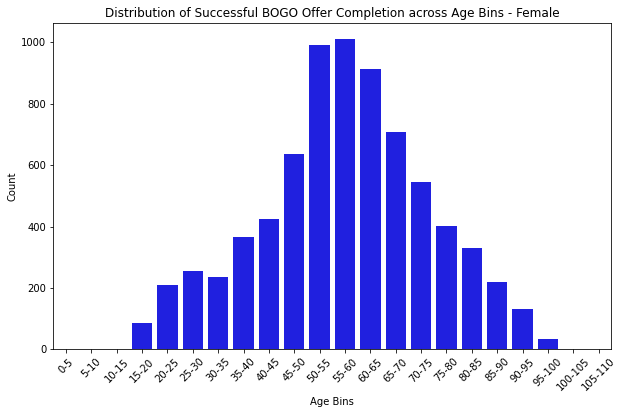

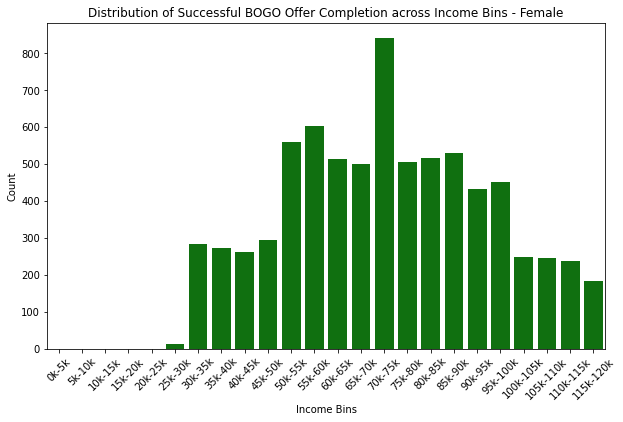

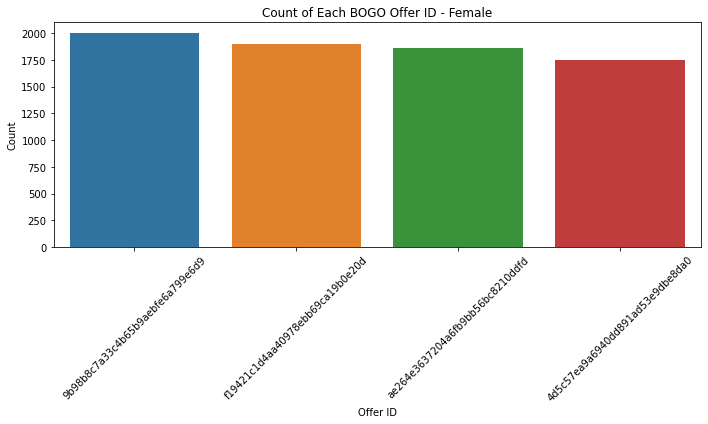

Count of Each BOGO Offer ID - Female:
                      refer_offer_id  count
0  9b98b8c7a33c4b65b9aebfe6a799e6d9   1999
1  f19421c1d4aa40978ebb69ca19b0e20d   1899
2  ae264e3637204a6fb9bb56bc8210ddfd   1857
3  4d5c57ea9a6940dd891ad53e9dbe8da0   1746


In [36]:
# Filter the bogo_completed_df for gender_F = 1
bogo_Female_completed_df = bogo_completed_df[bogo_completed_df['gender_F'] == 1]

# Now, plotting the distribution of successful BOGO offer completion across age bins with gender_F = 1
bogo_Female_completed_df['age_binned'] = pd.cut(
    bogo_Female_completed_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=bogo_Female_completed_df, color='blue')
plt.title('Distribution of Successful BOGO Offer Completion across Age Bins - Female')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful BOGO offer completion across Income Bins with gender_F = 1
bogo_Female_completed_df['income_binned'] = pd.cut(
    bogo_Female_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=bogo_Female_completed_df, color='green')
plt.title('Distribution of Successful BOGO Offer Completion across Income Bins - Female')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each BOGO offer_id with gender_F = 1
offer_id_BOGO_F_counts = bogo_Female_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_BOGO_F_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_BOGO_F_counts, order=offer_id_BOGO_F_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each BOGO Offer ID - Female')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout() # Adjust layout to make sure everything fits without overlapping
plt.show()

print("Count of Each BOGO Offer ID - Female:\n",offer_id_BOGO_F_counts)

## Result - BOGO - Female:
The code filters for BOGO offers completed by female customers and generates visualizations and counts for these specific demographics. The plots provide data specifically on female customers' interactions with BOGO offers, categorized by offer ID, income, and age.

**From the Distribution of Successful BOGO Offer Completion across Age Bins - Female**:

 - The histogram shows the distribution of successful offer completions across age bins for female customers. The peak of completion is in the age bin "55-60," which is consistent with the general age distribution, suggesting that females in this age range are most active in completing BOGO offers.
 

**From the Distribution of Successful Offer Completion across Income Bins - Female**:

 - The histogram illustrates the distribution of successful offer completions across income bins for female customers. Similar to the general distribution, the highest count is in the income bin "70k-75k," indicating that female customers in this income range are most likely to complete the BOGO offer.

**From the Count of Each BOGO Offer ID - Female**:

 - The bar chart shows the count of each BOGO Offer ID specifically for female customers. The distribution of completions across different offer IDs is fairly even, with the first Offer ID being slightly more popular than the others.
 - The count of each BOGO Offer ID for females shows a slightly different preference order than the overall, with the Offer ID "9b98b8c7a33c4b65b9aebfe6a799e6d9" being the most popular among females, followed by "f19421c1d4aa40978ebb69ca19b0e20d," "ae264e3637204a6fb9bb56bc8210ddfd," and "4d5c57ea9a6940dd891ad53e9dbe8da0."


**Inference**:

 - Female customers show a similar pattern of BOGO offer completion to the overall population, with slight variations in the popularity of offers.
 - Female customers with incomes around 70,000 to 75,000 and in the age range of 55-60 are the most likely to complete BOGO offers.
 - There is a consistent interest in the same set of offers among female customers as with the general population, indicating that these offers are appealing across genders.

 - ## III.) Male customers - BOGO:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


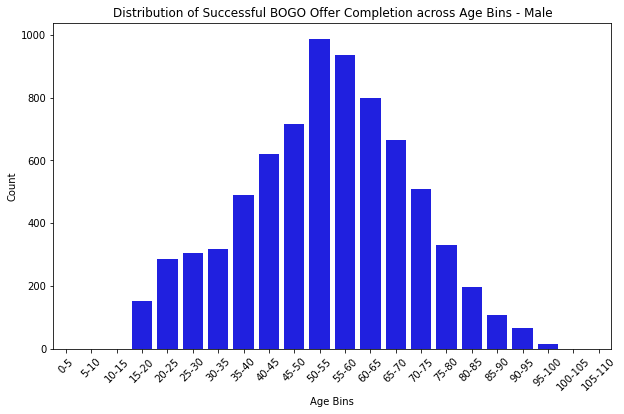

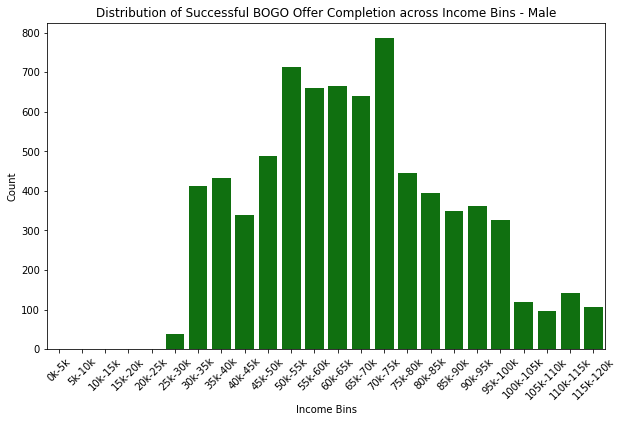

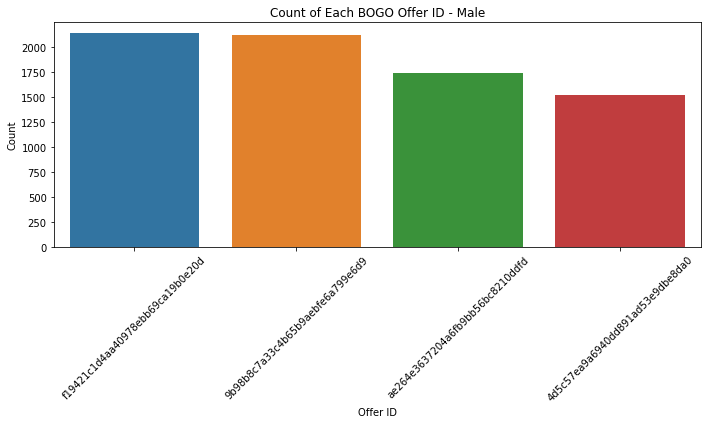

Count of Each BOGO Offer ID - Male:
                      refer_offer_id  count
0  f19421c1d4aa40978ebb69ca19b0e20d   2137
1  9b98b8c7a33c4b65b9aebfe6a799e6d9   2115
2  ae264e3637204a6fb9bb56bc8210ddfd   1741
3  4d5c57ea9a6940dd891ad53e9dbe8da0   1519


In [37]:
# Filter the bogo_completed_df for gender_M = 1
bogo_Male_completed_df = bogo_completed_df[bogo_completed_df['gender_M'] == 1]

# Now, plotting the distribution of successful BOGO offer completion across age bins with gender_M = 1
bogo_Male_completed_df['age_binned'] = pd.cut(
    bogo_Male_completed_df['age'],
    bins=age_bins,
    include_lowest=True, 
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=bogo_Male_completed_df, color='blue')
plt.title('Distribution of Successful BOGO Offer Completion across Age Bins - Male')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful BOGO offer completion across Income Bins with gender_M = 1
bogo_Male_completed_df['income_binned'] = pd.cut(
    bogo_Male_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=bogo_Male_completed_df, color='green')
plt.title('Distribution of Successful BOGO Offer Completion across Income Bins - Male')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each BOGO offer_id with gender_M = 1
offer_id_BOGO_M_counts = bogo_Male_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_BOGO_M_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_BOGO_M_counts, order=offer_id_BOGO_M_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each BOGO Offer ID - Male')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout() # Adjust layout to make sure everything fits without overlapping
plt.show()

print("Count of Each BOGO Offer ID - Male:\n",offer_id_BOGO_M_counts)

## Result - BOGO - Male:
The code filters data regarding the distribution of BOGO offers completed by male customers, segmented by offer ID, income, and age.

**From the Distribution of Successful Offer Completion across Age Bins - Male**:

 - The histogram indicates the distribution of successful offer completions across age bins for male customers. The peak is in the age bin "60-65," which suggests a slight difference from the female customers' most active age bin.


**From the Distribution of Successful Offer Completion across Income Bins - Male**:

 - The histogram depicts the distribution of successful BOGO offer completions across income bins for male customers. The distribution shows that the highest count is in the income bin "65k-70k," differing slightly from the female customers' most active income bin.

**From the Count of Each Offer ID - Male**:

 - The bar chart illustrates the count of each BOGO Offer ID specifically for male customers. The Offer ID "f19421c1d4aa40978ebb69ca19b0e20d" has the highest count, followed by "9b98b8c7a33c4b65b9aebfe6a799e6d9", with the other two slightly lower.
 - The count of each BOGO Offer ID for males shows a different order of popularity compared to females, with "f19421c1d4aa40978ebb69ca19b0e20d" being the most completed offer among males, followed by "9b98b8c7a33c4b65b9aebfe6a799e6d9", "ae264e3637204a6fb9bb56bc8210ddfd", and "4d5c57ea9a6940dd891ad53e9dbe8da0". 


**Inference**:

 - Male customers also demonstrate a close completion rate for BOGO offers, but the most popular offer differs from the female customers' preference.
 - Male customers with incomes around 65,000 to 70,000 are most likely to complete BOGO offers, which is a lower income bin than that of the most active female customers.
 - The age group most frequently completing BOGO offers among males is 60-65, which is slightly older compared to the female peak at 55-60.
 - Offer preferences vary slightly between male and female customers, indicating that the effectiveness of offers can be gender-specific.

# B.) Offer - Discount

  - ## I.) Generic customers:

In [38]:
# Filter the DataFrame for rows where offer_discount is 1
discount_df = data[data['offer_discount'] == 1].copy()

print('\nSum of reward credited through discount = ',discount_df['reward'].sum()) 
print("\nTotal Male customers availed discount offer = ",discount_df[discount_df['gender_M']==1]['gender_M'].sum())
print("\nTotal Female customers availed discount offer = ",discount_df[discount_df['gender_F']==1]['gender_F'].sum())
print("\nTotal customers with other gender availed discount offer = ",discount_df[discount_df['gender_O']==1]['gender_O'].sum())
print("\nIn successful year 2017, total customers availed discount offer: ",discount_df[discount_df['year']==2017]['year'].value_counts()) 


Sum of reward credited through discount =  201188.0

Total Male customers availed discount offer =  34739.0

Total Female customers availed discount offer =  26652.0

Total customers with other gender availed discount offer =  920.0

In successful year 2017, total customers availed discount offer:  2017.0    23058
Name: year, dtype: int64


In [39]:
discount_df.describe()

,time,amount,transactions,offers_received,offers_viewed,offers_completed,difficulty,duration,reward,web,...,offer_discount,offer_informational,age,income,year,month,day,gender_F,gender_M,gender_O
count,69898.000000,69898.0,69898.0,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000,69898.0,...,69898.0,69898.0,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000,69898.000000
mean,14.943478,0.0,0.0,0.436965,0.306804,0.256231,11.102936,8.458926,2.878308,1.0,...,1.0,0.0,48.904733,59373.115111,1797.678131,5.975464,14.167086,0.381298,0.496996,0.013162
std,8.275285,0.0,0.0,0.496014,0.461171,0.436554,4.588013,1.499448,1.134583,0.0,...,0.0,0.0,23.513382,28965.205832,627.290086,3.904882,9.594874,0.485709,0.499995,0.113969
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,7.000000,7.000000,2.000000,1.0,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,0.0,0.0,0.000000,0.000000,0.000000,7.000000,7.000000,2.000000,1.0,...,1.0,0.0,36.000000,43000.000000,2015.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,17.000000,0.0,0.0,0.000000,0.000000,0.000000,10.000000,7.000000,2.000000,1.0,...,1.0,0.0,53.000000,61000.000000,2017.000000,6.000000,14.000000,0.000000,0.000000,0.000000
75%,21.500000,0.0,0.0,1.000000,1.000000,1.000000,10.000000,10.000000,3.000000,1.0,...,1.0,0.0,65.000000,79000.000000,2017.000000,9.000000,23.000000,1.000000,1.000000,0.000000
max,29.750000,0.0,0.0,1.000000,1.000000,1.000000,20.000000,10.000000,5.000000,1.0,...,1.0,0.0,101.000000,120000.000000,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000


Female customers who completed Discount offer:  7976.0
Male customers who completed Discount offer:  8954.0


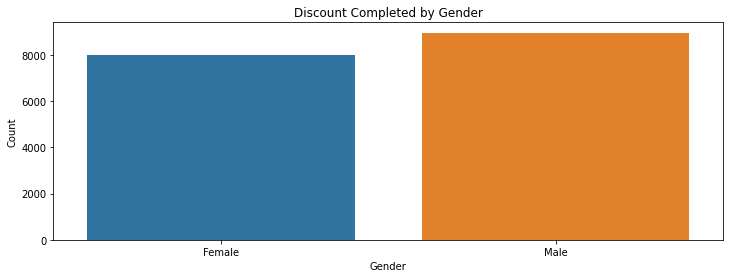

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


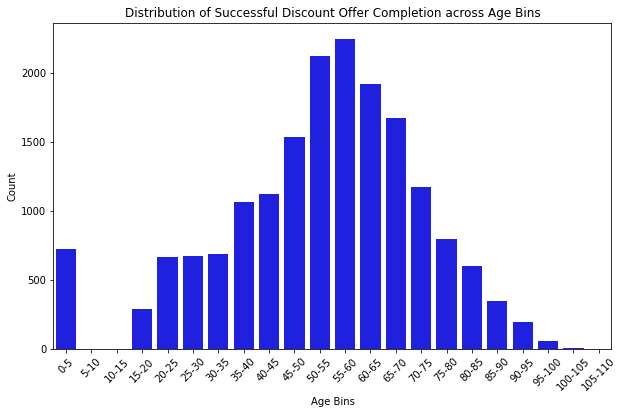

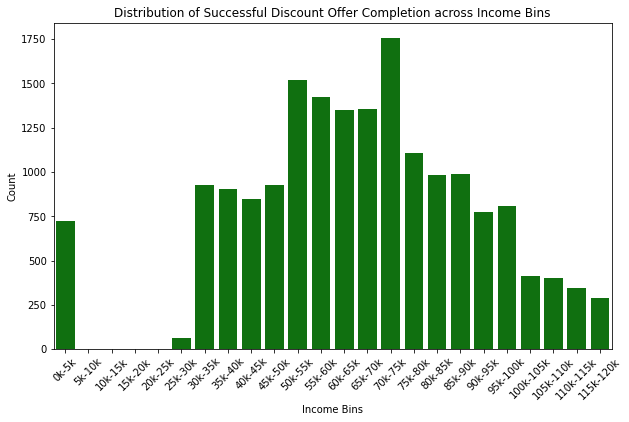

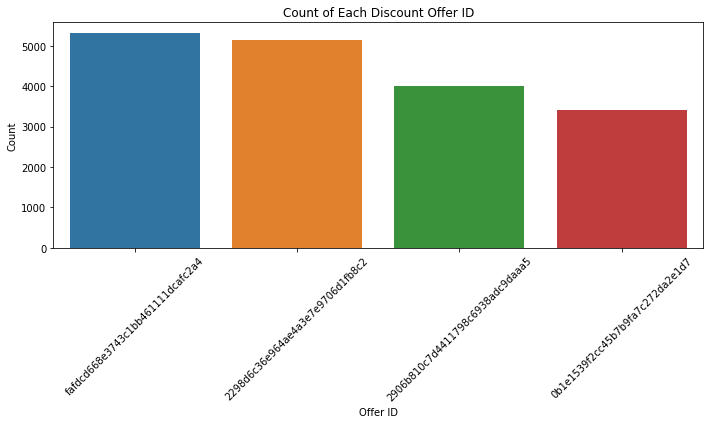

Count of Each Discount Offer ID:
                      refer_offer_id  count
0  fafdcd668e3743c1bb461111dcafc2a4   5317
1  2298d6c36e964ae4a3e7e9706d1fb8c2   5156
2  2906b810c7d4411798c6938adc9daaa5   4017
3  0b1e1539f2cc45b7b9fa7c272da2e1d7   3420


In [40]:
# Filter the DataFrame for offer_completed = 1
discount_completed_df = discount_df[discount_df['offers_completed'] == 1]

# Female customers who completed discount offer
fem_discount_completed = (discount_completed_df[discount_completed_df['gender_F'] == 1])['gender_F'].sum()

# male customers who completed discount offer
mal_discount_completed = (discount_completed_df[discount_completed_df['gender_M'] == 1])['gender_M'].sum()


print("Female customers who completed Discount offer: ",fem_discount_completed)
print("Male customers who completed Discount offer: ",mal_discount_completed)

counts_discount = [fem_discount_completed, mal_discount_completed]

#Plot Gender count as Female Vs Male
sns.barplot(x=genders, y=counts_discount)
plt.title('Discount Completed by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Now, plotting the distribution of successful Discount offer completion across age bins
discount_completed_df['age_binned'] = pd.cut(
    discount_completed_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=discount_completed_df, color='blue')
plt.title('Distribution of Successful Discount Offer Completion across Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful Discount offer completion across Income Bins
discount_completed_df['income_binned'] = pd.cut(
    discount_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=discount_completed_df, color='green')
plt.title('Distribution of Successful Discount Offer Completion across Income Bins')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Count the occurrences of each Discount offer_id
offer_id_dist_counts = discount_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_dist_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_dist_counts, order=offer_id_dist_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Discount Offer ID')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout() # Adjust layout to make sure everything fits without overlapping
plt.show()

print("Count of Each Discount Offer ID:\n",offer_id_dist_counts)

## Result - Discount - Generic:

The Plots illustrate data on the distribution of discount offers completed, analyzed by offer ID, income, age, and gender.


**From the Discount Completed by Gender**:
 - The bar chart compares the count of discount offers completed by gender. More male customers (8954) have completed discount offers compared to female customers (7976).


**From the Distribution of Successful Discount Offer Completion across Age Bins**:

 - The histogram illustrates the distribution of successful discount offer completions across different age bins. The peak of completions is in the "55-60" age bin, suggesting that individuals in this age range are the most active in completing discount offers.


**From the Distribution of Successful Discount Offer Completion across Income Bins**:

 - The histogram shows the distribution of successful discount offer completions across different income bins. The peak of the distribution is in the "70k-75k" income bin, which indicates that individuals within this income range complete the most discount offers.

**From the Count of Each Discount Offer ID**:

 - The bar chart displays the count of each Discount Offer ID. The most popular discount offer is represented by the blue bar, followed closely by the orange and green bars, and the red bar has the least number of completions.
 - The offer ID counts indicate that the most popular discount offer is "fafdcd668e3743c1bb461111dcafc2a4" with 5317 completions, followed by "2298d6c36e964ae4a3e7e9706d1fb8c2", "2906b810c7d4411798c6938adc9daaa5", and "0b1e1539f2cc45b7b9fa7c272da2e1d7".


**Inference**:

 - Discount offers are more popular among males than females.
 - People with incomes around 70,000 to 75,000 are the most likely to complete discount offers, which is consistent with the  - BOGO offer income distribution.
 - The age group most frequently completing discount offers is 55-60, similar to the age distribution for BOGO offers.
 - There is a clear preference for certain discount offers, with "fafdcd668e3743c1bb461111dcafc2a4" being the most completed. Preferences for discount offers might differ from BOGO offers, suggesting different motivations or appeal to customers.

 ## - II.) Female customers - Discount:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


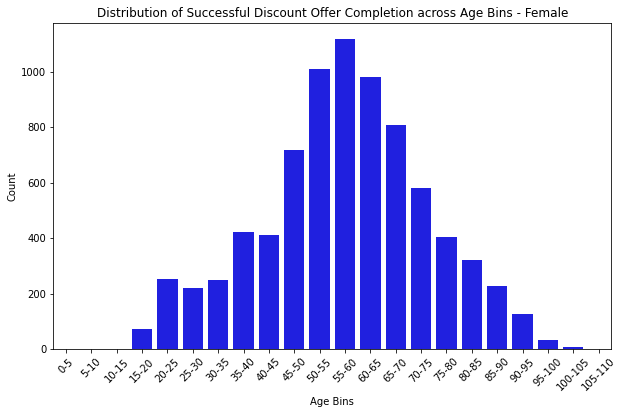

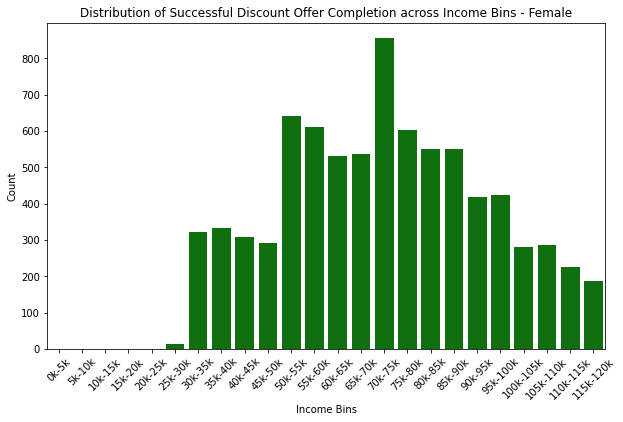

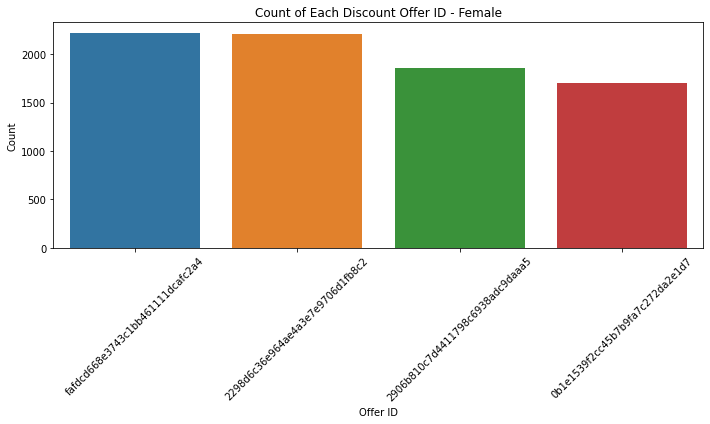

Count of Each Discount Offer ID - Female:
                      refer_offer_id  count
0  fafdcd668e3743c1bb461111dcafc2a4   2216
1  2298d6c36e964ae4a3e7e9706d1fb8c2   2206
2  2906b810c7d4411798c6938adc9daaa5   1851
3  0b1e1539f2cc45b7b9fa7c272da2e1d7   1703


In [41]:
# Filter the discount_completed_df for gender_F = 1
discount_Female_completed_df = discount_completed_df[discount_completed_df['gender_F'] == 1]

# Now, plotting the distribution of successful Discount offer completion across age bins with gender_F = 1
discount_Female_completed_df['age_binned'] = pd.cut(
    discount_Female_completed_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=discount_Female_completed_df, color='blue')
plt.title('Distribution of Successful Discount Offer Completion across Age Bins - Female')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful Discount offer completion across Income Bins with gender_F = 1
discount_Female_completed_df['income_binned'] = pd.cut(
    discount_Female_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=discount_Female_completed_df, color='green')
plt.title('Distribution of Successful Discount Offer Completion across Income Bins - Female')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each Discount offer_id with gender_F = 1
offer_id_DIST_F_counts = discount_Female_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_DIST_F_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_DIST_F_counts, order=offer_id_DIST_F_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Discount Offer ID - Female')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

print("Count of Each Discount Offer ID - Female:\n",offer_id_DIST_F_counts)

## Result - Discount - Female:
The code focus on discount offers completed by female customers and provide data segregated by offer ID, income, and age.

**From the Distribution of Successful Discount Offer Completion across Age Bins - Female**:

 - The histogram shows the distribution of successful discount offer completions across age bins for female customers. The peak is in the "55-60" age bin, which is consistent with the previously observed trends in the general and male-specific data, suggesting that this age range is particularly responsive to discount offers among females.

**From the  Distribution of Successful Discount Offer Completion across Income Bins - Female**:

 - The histogram illustrates the distribution of successful discount offer completions across income bins for female customers.
 - The highest count is in the "70k-75k" income bin, indicating that females within this income range complete the most discount offers, mirroring the general distribution.

**From the Count of Each Discount Offer ID - Female**:

 - The bar chart indicates the count of each Discount Offer ID specifically for female customers. The most completed discount offer is "fafdcd668e3743c1bb461111dcafc2a4", closely followed by "2298d6c36e964ae4a3e7e9706d1fb8c2", with the other two offers having slightly fewer completions.
 - The counts show that the offer ID "fafdcd668e3743c1bb461111dcafc2a4" has the highest number of completions among females (2216), followed by "2298d6c36e964ae4a3e7e9706d1fb8c2" (2206), "2906b810c7d4411798c6938adc9daaa5" (1851), and "0b1e1539f2cc45b7b9fa7c272da2e1d7" (1703).


**Inference**:

 - Female customers are most active in discount offer completions within the age range of 55-60, consistent with the overall trends.
 - The income bracket of 70,000 to 75,000 is where the most active female customers are, which aligns with the distribution seen in the general discount offer completion data.
 - There is a slight variation in offer preference among females compared to the general population, with different offers being favored by female customers.

## - III.) Male customers - Discount:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


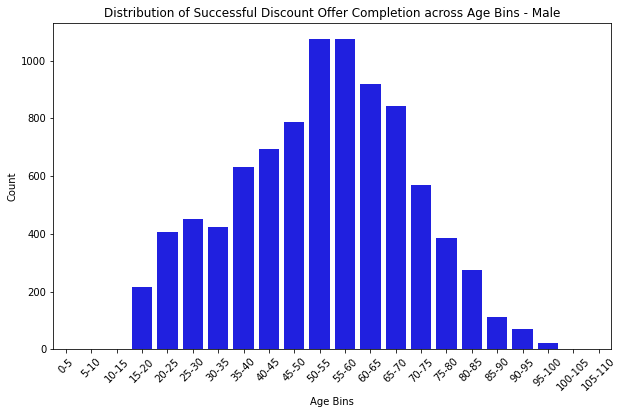

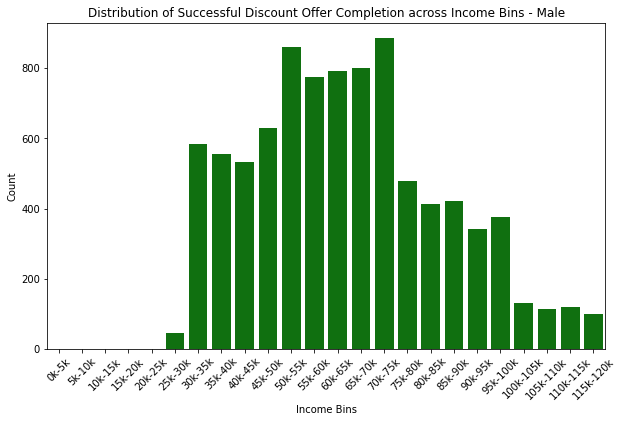

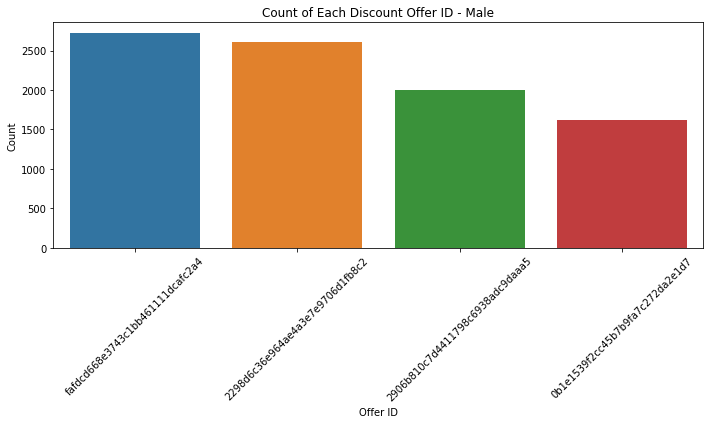

Count of Each Discount Offer ID - Male:
                      refer_offer_id  count
0  fafdcd668e3743c1bb461111dcafc2a4   2721
1  2298d6c36e964ae4a3e7e9706d1fb8c2   2613
2  2906b810c7d4411798c6938adc9daaa5   2000
3  0b1e1539f2cc45b7b9fa7c272da2e1d7   1620


In [42]:
# Filter the discount_completed_df for gender_M = 1
discount_Male_completed_df = discount_completed_df[discount_completed_df['gender_M'] == 1]

# Now, plotting the distribution of successful discount offer completion across age bins with gender_M = 1
discount_Male_completed_df['age_binned'] = pd.cut(
    discount_Male_completed_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=discount_Male_completed_df, color='blue')
plt.title('Distribution of Successful Discount Offer Completion across Age Bins - Male')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful discount offer completion across Income Bins with gender_M = 1
discount_Male_completed_df['income_binned'] = pd.cut(
    discount_Male_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=discount_Male_completed_df, color='green')
plt.title('Distribution of Successful Discount Offer Completion across Income Bins - Male')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each discount offer_id with gender_M = 1
offer_id_DIST_M_counts = discount_Male_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_DIST_M_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_DIST_M_counts, order=offer_id_DIST_M_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Discount Offer ID - Male')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

print("Count of Each Discount Offer ID - Male:\n",offer_id_DIST_M_counts)

## Result - Discount - Male:
The code focus on the distribution of discount offers completed by male customers, analyzed by offer ID, income, and age.

**From the Distribution of Successful Discount Offer Completion across Age Bins - Male**:

 - The histogram presents the distribution of successful discount offer completions across age bins for male customers. The peak of the distribution is in the "55-60" age bin, which is consistent with the peak observed in the female and overall distributions, suggesting this age range is particularly engaged with discount offers among males as well.

**From the Distribution of Successful Discount Offer Completion across Income Bins - Male**:

 - The histogram displays the distribution of successful discount offer completions across income bins for male customers. The highest count is within the "65k-70k" income bin, indicating that males within this income range are most likely to complete discount offers.

**From the Count of Each Discount Offer ID - Male**:

 - The bar chart shows the count of each Discount Offer ID specifically for male customers. The offer ID "fafdcd668e3743c1bb461111dcafc2a4" has the highest number of completions, followed by "2298d6c36e964ae4a3e7e9706d1fb8c2", "2906b810c7d4411798c6938adc9daaa5", and "0b1e1539f2cc45b7b9fa7c272da2e1d7".
 - The offer completion counts for males show that the offer ID "fafdcd668e3743c1bb461111dcafc2a4" has the highest number of completions (2721), followed by "2298d6c36e964ae4a3e7e9706d1fb8c2" (2613), "2906b810c7d4411798c6938adc9daaa5" (2000), and "0b1e1539f2cc45b7b9fa7c272da2e1d7" (1620).


**Inference**:

 - Male customers, like their female counterparts, show the most engagement with discount offers in the "55-60" age range.
 - The income bracket most responsive to discount offers among males is slightly lower than females, with the peak at "65k-70k" compared to "70k-75k" for females.
 - The discount offer preferences are similar between male and female customers, with "fafdcd668e3743c1bb461111dcafc2a4" being  - the most popular for both genders.

# C.) Offer - Informational

## - I.) Generic customers:

In [43]:
# Filter the DataFrame for rows where offer_informational = 1
info_df = data[data['offer_informational'] == 1].copy()

print('\nSum of reward credited through Informational offer= ',info_df['reward'].sum()) 
print("\nTotal Male customers availed Informational offer = ",info_df[info_df['gender_M']==1]['gender_M'].sum())
print("\nTotal Female customers availed Informational offer = ",info_df[info_df['gender_F']==1]['gender_F'].sum())
print("\nTotal customers with other gender availed Informational offer = ",info_df[info_df['gender_O']==1]['gender_O'].sum())
print("\nIn successful year 2017, total customers availed Informational offer: ",info_df[info_df['year']==2017]['year'].value_counts()) 


Sum of reward credited through Informational offer=  0.0

Total Male customers availed Informational offer =  12856.0

Total Female customers availed Informational offer =  9448.0

Total customers with other gender availed Informational offer =  356.0

In successful year 2017, total customers availed Informational offer:  2017.0    8689
Name: year, dtype: int64


In [44]:
info_df.describe()

,time,amount,transactions,offers_received,offers_viewed,offers_completed,difficulty,duration,reward,web,...,offer_discount,offer_informational,age,income,year,month,day,gender_F,gender_M,gender_O
count,26066.000000,26066.0,26066.0,26066.000000,26066.000000,26066.0,26066.0,26066.000000,26066.0,26066.000000,...,26066.0,26066.0,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,14.248638,0.0,0.0,0.584478,0.415522,0.0,0.0,3.451201,0.0,0.451201,...,0.0,1.0,47.461828,56898.104811,1753.104696,5.842323,13.791683,0.362465,0.493210,0.013658
std,8.274484,0.0,0.0,0.492821,0.492821,0.0,0.0,0.497622,0.0,0.497622,...,0.0,0.0,24.471507,29627.930844,679.687268,3.958028,9.788057,0.480721,0.499963,0.116067
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.0,0.000000,...,0.0,1.0,34.000000,41000.000000,2015.000000,2.000000,5.000000,0.000000,0.000000,0.000000
50%,16.750000,0.0,0.0,1.000000,0.000000,0.0,0.0,3.000000,0.0,0.000000,...,0.0,1.0,52.000000,59000.000000,2017.000000,6.000000,14.000000,0.000000,0.000000,0.000000
75%,21.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,4.000000,0.0,1.000000,...,0.0,1.0,65.000000,76000.000000,2017.000000,9.000000,22.000000,1.000000,1.000000,0.000000
max,29.750000,0.0,0.0,1.000000,1.000000,0.0,0.0,4.000000,0.0,1.000000,...,0.0,1.0,101.000000,120000.000000,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000


Female customers who completed Informational offer:  9448.0
Male customers who completed Informational offer:  12856.0


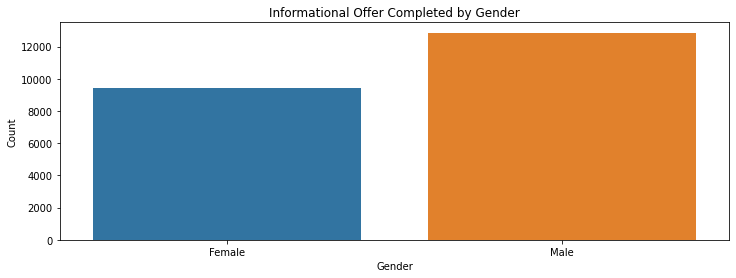

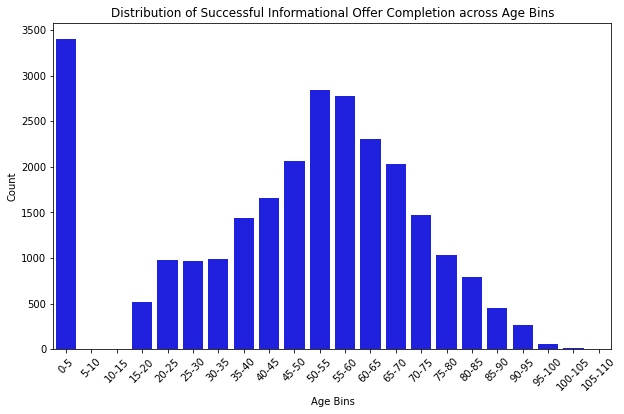

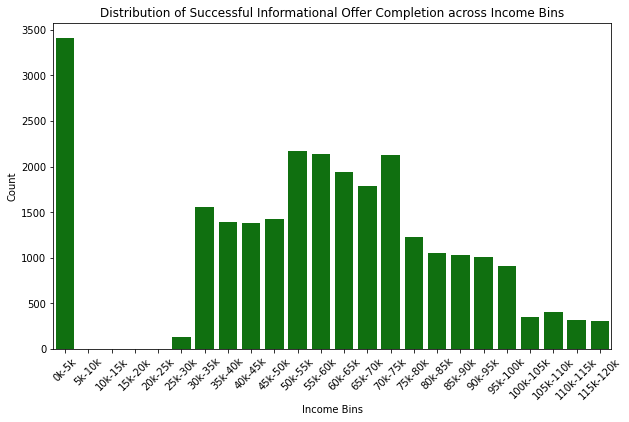

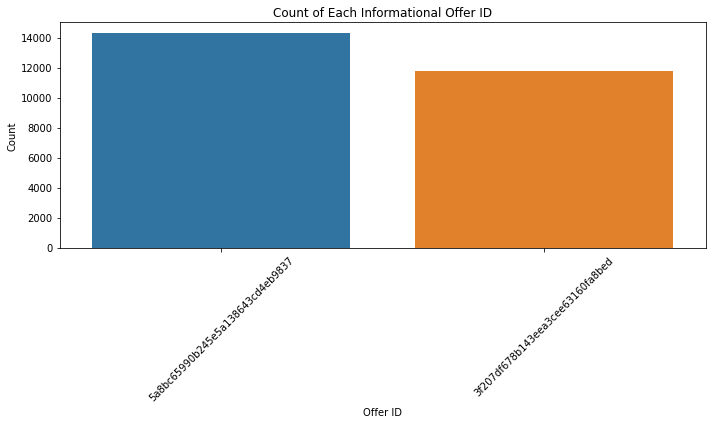

Count of Each Informational Offer ID:
                      refer_offer_id  count
0  5a8bc65990b245e5a138643cd4eb9837  14305
1  3f207df678b143eea3cee63160fa8bed  11761


In [45]:
# Female customers who completed Informational offer 
fem_info_completed = (info_df[info_df['gender_F'] == 1])['gender_F'].sum()

# male customers who completed Informational offer 
mal_info_completed = (info_df[info_df['gender_M'] == 1])['gender_M'].sum()


print("Female customers who completed Informational offer: ",fem_info_completed)
print("Male customers who completed Informational offer: ",mal_info_completed)

counts_info = [fem_info_completed, mal_info_completed]

#Plot Gender count as Female Vs Male
sns.barplot(x=genders, y=counts_info)
plt.title('Informational Offer Completed by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Now, plotting the distribution of successful Informational offer completion across age bins
info_df['age_binned'] = pd.cut(
    info_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=info_df, color='blue')
plt.title('Distribution of Successful Informational Offer Completion across Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful Informational offer completion across Income Bins
info_df['income_binned'] = pd.cut(
    info_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=info_df, color='green')
plt.title('Distribution of Successful Informational Offer Completion across Income Bins')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Count the occurrences of each Informational offer_id
offer_id_info_counts = info_df['refer_offer_id'].value_counts().reset_index()
offer_id_info_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_info_counts, order=offer_id_info_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Informational Offer ID')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

print('Count of Each Informational Offer ID:\n',offer_id_info_counts)

## Result - Informational - Generic:

The Plots indicate data about informational offers completed by customers, broken down by gender, age, and income.

**From the Informational Offer Completed by Gender**:

 - The bar chart indicates that male customers completed more informational offers than female customers, with counts of 12,856 and 9,448 respectively.

**From the Distribution of Successful Informational Offer Completion across Age Bins**:

 - The histogram shows the distribution of successful informational offer completions across age bins. The highest concentration of completions is in the age bin "65-70", suggesting that customers in this age range are most likely to engage with informational offers.

**From the Distribution of Successful Informational Offer Completion across Income Bins**:

 - The histogram depicts the distribution of successful informational offer completions across income bins. The "50k-55k" income bin shows the highest count, which is notably different from both the discount and BOGO offer completion income distributions, suggesting that informational offers might appeal to a different economic demographic.

**From the Count of Each Informational Offer ID**:

 - The bar chart shows the count of each Informational Offer ID, indicating that the offer ID "5a8bc65990b245e5a138643cd4eb9837" has more completions (14,305) compared to the offer ID "3f207df678b143eea3cee63160fa8bed" (11,761).


**Inference**:

 - Informational offers are more popular among male customers compared to female customers.
 - Customers in the age range of 65-70 are the most engaged with informational offers, which suggests that this demographic finds informational offers to be more relevant or appealing.
 - The income distribution for informational offer completions peaks at lower income brackets compared to the distribution for BOGO and discount offer completions, which might indicate that different types of offers appeal to different economic segments of the population.
 - There are two informational offers in the dataset, with a significantly higher number of completions for the offer ID "5a8bc65990b245e5a138643cd4eb9837" compared to "3f207df678b143eea3cee63160fa8bed".

## - II.) Female customers - Informational:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


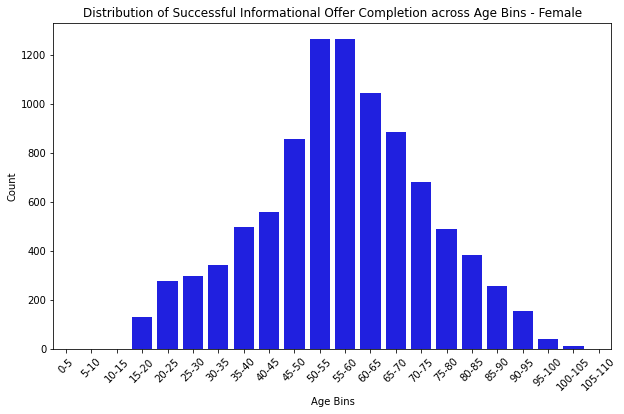

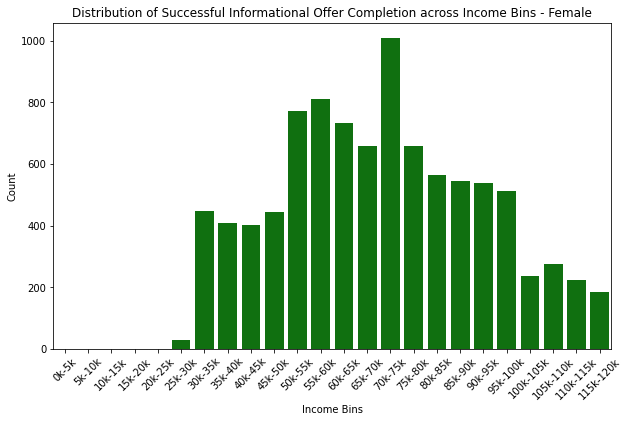

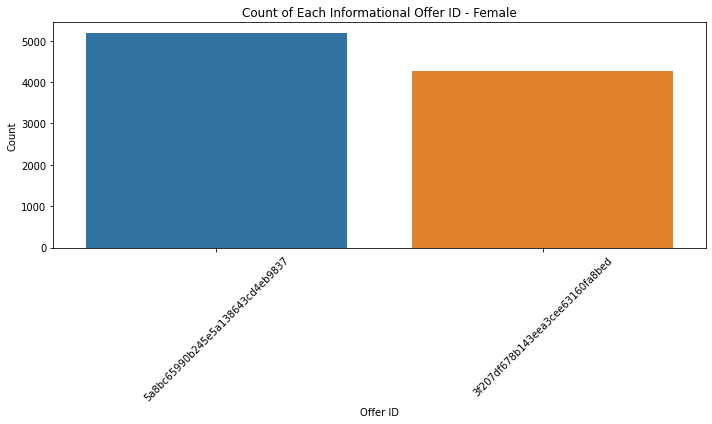

Count of Each Informational Offer ID - Female:
                      refer_offer_id  count
0  5a8bc65990b245e5a138643cd4eb9837   5184
1  3f207df678b143eea3cee63160fa8bed   4264


In [46]:
# Filter the info_df for gender_F = 1
info_Female_df = info_df[info_df['gender_F'] == 1]

# Now, plotting the distribution of successful Informational offer completion across age bins with gender_F = 1

info_Female_df['age_binned'] = pd.cut(
    info_Female_df['age'],
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=info_Female_df, color='blue')
plt.title('Distribution of Successful Informational Offer Completion across Age Bins - Female')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful Informational offer completion across Income Bins with gender_F = 1
info_Female_df['income_binned'] = pd.cut(
    info_Female_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=info_Female_df, color='green')
plt.title('Distribution of Successful Informational Offer Completion across Income Bins - Female')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each Informational offer_id with gender_F = 1
offer_id_INFO_F_counts = info_Female_df['refer_offer_id'].value_counts().reset_index()
offer_id_INFO_F_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_INFO_F_counts, order=offer_id_INFO_F_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Informational Offer ID - Female')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

print("Count of Each Informational Offer ID - Female:\n",offer_id_INFO_F_counts)

## Result - Informational - Female:
The Plots provide a breakdown of the distribution of successful informational offer completions by female customers, across various age and income bins, as well as the count of completions per offer ID.

**From the Distribution of Successful Informational Offer Completion across Age Bins - Female**:

 - The histogram illustrates the age distribution for successful informational offer completions among female customers. The most active age group is 55-60 years, showing the highest number of completions.

**From the Distribution of Successful Informational Offer Completion across Income Bins - Female**:

 - The histogram depicts the distribution of informational offer completions across income bins for female customers. The peak of the distribution is in the "65k-70k" income bin, suggesting that this is the most common income range among females completing informational offers.

**From the Count of Each Informational Offer ID - Female**:

 - The bar chart shows the count of each informational offer ID among female customers. The offer ID "5a8bc65990b245e5a138643cd4eb9837" has more completions (5184) than the offer ID "3f207df678b143eea3cee63160fa8bed" (4264).

**Inference**:

 - Female customers within the age range of 55-60 are the most likely to engage with informational offers, which is in line with the trends seen in the male demographic and the overall population.
 - The income bracket of 65,000 to 70,000 is the most common among females completing informational offers, which is different from the most common income range for male informational offer completions.
 - There are two informational offers present in the dataset, with "5a8bc65990b245e5a138643cd4eb9837" being more popular among females than "3f207df678b143eea3cee63160fa8bed".

## - III.) Male customers - Informational:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


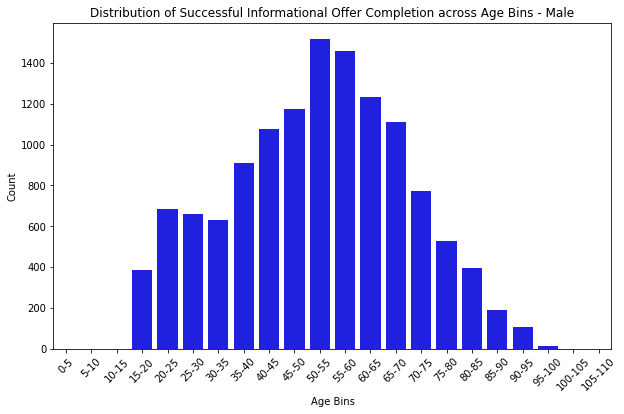

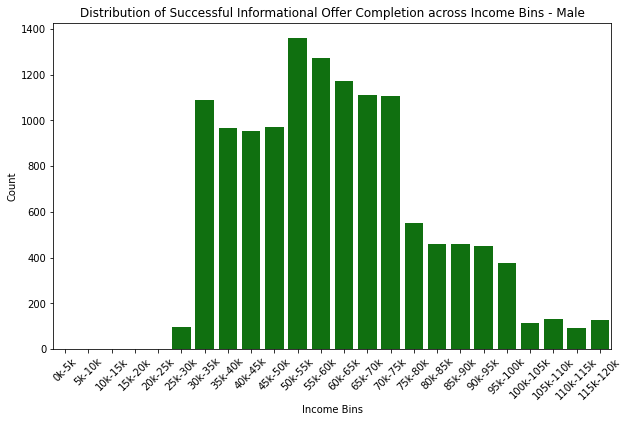

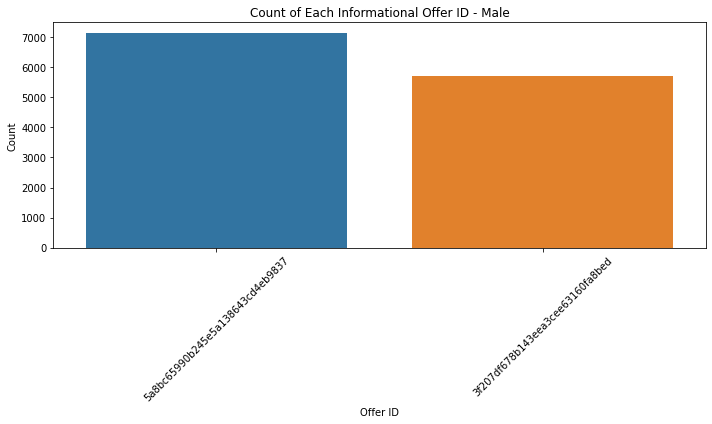

Count of Each Informational Offer ID - Male:
                      refer_offer_id  count
0  5a8bc65990b245e5a138643cd4eb9837   7142
1  3f207df678b143eea3cee63160fa8bed   5714


In [47]:
# Filter the info_df for for gender_M = 1
info_Male_completed_df = info_df[info_df['gender_M'] == 1]

# Now, plotting the distribution of successful Informational offer completion across age bins with gender_M = 1
info_Male_completed_df['age_binned'] = pd.cut(
    info_Male_completed_df['age'], 
    bins=age_bins,
    include_lowest=True,
    labels=[f"{int(i)}-{int(i+5)}" for i in range(0, 110, 5)])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_binned', data=info_Male_completed_df, color='blue')
plt.title('Distribution of Successful Informational Offer Completion across Age Bins - Male')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the distribution of successful Informational offer completion Income Bins with gender_M = 1
info_Male_completed_df['income_binned'] = pd.cut(
    info_Male_completed_df['income'],
    bins=income_bins,
    include_lowest=True,
    labels = [f"{i}k-{(i+5)}k" for i in range(0, 120, 5)]
)
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binned', data=info_Male_completed_df, color='green')
plt.title('Distribution of Successful Informational Offer Completion across Income Bins - Male')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each Informational offer_id with gender_M = 1
offer_id_INFO_M_counts = info_Male_completed_df['refer_offer_id'].value_counts().reset_index()
offer_id_INFO_M_counts.columns = ['refer_offer_id', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='refer_offer_id', y='count', data=offer_id_INFO_M_counts, order=offer_id_INFO_M_counts.sort_values('count', ascending=False)['refer_offer_id'])
plt.xticks(rotation=45)
plt.title('Count of Each Informational Offer ID - Male')
plt.xlabel('Offer ID')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

print("Count of Each Informational Offer ID - Male:\n",offer_id_INFO_M_counts)

## Result - Informational - Male:
The Plots give insights into the completion of informational offers by male customers, segregated by age, income, and the specific offer IDs.

**From the Distribution of Successful Informational Offer Completion across Age Bins - Male**:

 - The histogram shows the age distribution of male customers who completed informational offers. The largest group completing offers is between the ages of 60-65, which suggests that this is the most engaged age range for male customers in regards to informational offers.

**From the Distribution of Successful Informational Offer Completion across Income Bins - Male**:

 - The histogram depicts the income distribution of male customers who completed informational offers. The peak completion is within the "60k-65k" income bin, indicating that informational offers are most completed by males in this income range.

**From the Count of Each Informational Offer ID - Male**:

 - The bar chart compares the completion of each informational offer ID by male customers. The offer ID "5a8bc65990b245e5a138643cd4eb9837" has a higher completion rate (7142) than the offer ID "3f207df678b143eea3cee63160fa8bed" (5714).
 - The provided code outputs corroborate these observations with specific counts for each informational offer ID among male customers.

**Inference**:

 - Male customers in the age range of 60-65 years are the most active in engaging with informational offers, slightly older than the most engaged female age group which peaked at 55-60 years.
 - The income bracket of 60,000 to 65,000 is where the most male completions of informational offers occur, which is a bit lower compared to the peak for female customers, which was in the 65,000 to 70,000 range.
 - The two informational offers show a clear preference among male customers, with offer ID "5a8bc65990b245e5a138643cd4eb9837" being more popular than "3f207df678b143eea3cee63160fa8bed", aligning with the preference observed among female customers.

## 3.Refinement:

# _Answers To Problem Statement_:
The table provides a comprehensive summary of customer interactions with three types of offers: BOGO, Discount, and Informational, segregated by gender (Generic, Female, Male). Here are some key inferences drawn from the table:

**1. Age Distribution**:

 - The most active age group for all offers is between 55-60 years for females. For males, this shifts slightly higher for BOGO and Informational offers, where the 60-65 age group is most active.

**2. Income Bracket**:

 - The income bracket most actively participating in BOGO and Discount offers is 70-75 thousand for both genders, suggesting these offers might be more appealing to a higher income segment.
 - For Informational offers, the trend changes, with the most active income bracket being 50-55 thousand for the Generic group, 65-70 thousand for females, and 60-65 thousand for males, indicating that these offers might be targeting or more appealing to a lower to mid-income range.

**3. Reward Points**:

 - A significant number of reward points (539,505) were distributed by BOGO offers, with nearly half the reward points (201,188) distributed by Discount offers.

**4. Customer Interactions**:

 - In 2017, there were 24,316 customer interactions for BOGO offers, with discount offers customers engaging less (1,258) compared to BOGO. The trend is similar for Discount offers but not applicable for Informational offers.
 - Informational offers had significantly fewer interactions (8,689) than the other types, suggesting that customers may be less engaged with informational promotions.

**5. Other Gender**:

 - A minor segment is recorded under "other gender" with 914 for BOGO, 920 for Discount, and 356 for Informational offers, indicating participation but on a much smaller scale compared to the main categories.

**6. Offer Popularity (by rank and offer ID)**:

 - The top BOGO offer for both genders is "9b98b8c7a33c4b65b9aebfe6a799e6d9", while the top Discount offer is "fafdcd668e3743c1bb461111dcafc2a4".
 - The second most popular offer changes between BOGO and Discount, with "f19421c1d4aa40978ebb69ca19b0e20d" for BOGO and "2298d6c36e964ae4a3e7e9706d1fb8c2" for Discount.
 - Informational offers have two ranks listed, with "5a8bc65990b245e5a138643cd4eb9837" being the most completed Informational offer ID for both genders.

**7. Gender Differences**:

 - Males seem to have a slightly higher completion rate for offers across all categories, with the gap being more pronounced for Informational offers.

These inferences can help tailor marketing strategies, indicating potential areas to target specific demographics and suggesting that personalization by age, income, and gender could improve engagement and conversion rates for these promotional offers.

# Model Evaluation and Validation

The follwing code significantly enhance the model's training process, especially when dealing with imbalanced datasets. Here’s a breakdown of how each part contributes to the overall process:

1. **Splitting the dataset into training and test sets** helps validate the model on unseen data, providing a better estimation of its performance in real-world scenarios.

2. **Ensuring y is of an integer type** is crucial for classification models to correctly interpret the target variable.

3. **Handling imbalance with SMOTE** (Synthetic Minority Over-sampling Technique) addresses the issue of imbalanced classes, which can bias the model towards the majority class and affect the performance on the minority class.

4. **Model training on the balanced dataset** allows the model to learn from an equal representation of classes, potentially improving its ability to generalize across both classes.

Incorporating this into the workflow enhances the model training phase by ensuring the data is correctly split, the target variable is in the right format, and class imbalance is addressed, leading to a more robust and fair model. However, it's important to note that the cross-validation step should ideally account for the SMOTE application to prevent data leakage. This means applying SMOTE within each fold of the cross-validation rather than before it. StratifiedKFold is used to maintain the original distribution of the target classes in each fold, which is particularly important for imbalanced datasets.   

Cross-validation is a powerful technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is especially useful for protecting against overfitting in a predictive model, as it allows you to tune hyperparameters with only your original training set. This means you don't need a separate validation set, which can be useful if your dataset isn't very large. One common method is k-fold cross-validation.

In [48]:
# Assigning the X matrix and target vector
X = data.drop(['offers_completed','person','refer_offer_id'], axis=1)
y = data['offers_completed']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y is of an integer type if it's not already
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Define a pipeline that includes SMOTE and the Random Forest Classifier
pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))

# Use Stratified K-Fold to maintain the proportion of the target class
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate the model with cross-validation to handle imbalance within each fold
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Average score: {np.mean(scores)}")

# Fit the model on the entire dataset
pipeline.fit(X_train, y_train)

# Predictions and evaluation on the test set
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy Score on Test Set: {accuracy_score(y_test, y_pred)}")

Cross-validated scores: [1. 1. 1. 1. 1.]
Average score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54542
           1       1.00      1.00      1.00      6765

    accuracy                           1.00     61307
   macro avg       1.00      1.00      1.00     61307
weighted avg       1.00      1.00      1.00     61307

Accuracy Score on Test Set: 1.0


While the perfect cross-validation scores suggest that the model is highly effective at the task it was trained for, caution is advised. It's crucial to investigate potential overfitting, data leakage, and the practical applicability of the model in real-world scenarios. Additional steps, such as external validation and real-world testing, are recommended to ensure the model's robustness and reliability.

## Discussion on Model Evaluation and Validation
**1. Perfect Scores**: The cross-validation and test set scores indicating perfect accuracy (1.0) and F1 score (1.0) across all classes are highly unusual in practice. This could suggest that the model is overfitting the data, the test set might not be challenging enough, or there could be a data leakage problem where the model has access to information it wouldn't have in a real-world scenario.

**2. Imbalanced Data Handling**: The application of SMOTE indicates an awareness of class imbalance issues. However, the perfect scores suggest that imbalance might not be the primary concern in your dataset, or the method of handling it might be too effective, leading to overfitting.

**3. Data Splitting**: Splitting the data into training and test sets is good practice, but the perfect performance on both sets suggests that the test set may not be entirely independent or representative of real-world unseen data.

## Identifying Responsive Groups
### Feature Importance:   
Use the model to analyze the importance of various features in predicting offer completion. Feature importance can give insights into which characteristics (e.g., age, income, gender, offer type) are most predictive of an offer being completed. This can help identify demographic segments or offer characteristics that are more likely to lead to a completed offer.  

After training our model (Random Forest classifier), you can examine the feature importances to identify which factors most influence offer completion.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Random Forest: Mean Accuracy: 0.9994, Mean F1 Score: 0.9986
Gradient Boosting: Mean Accuracy: 1.0000, Mean F1 Score: 1.0000
Logistic Regression: Mean Accuracy: 0.8940, Mean F1 Score: 0.6899


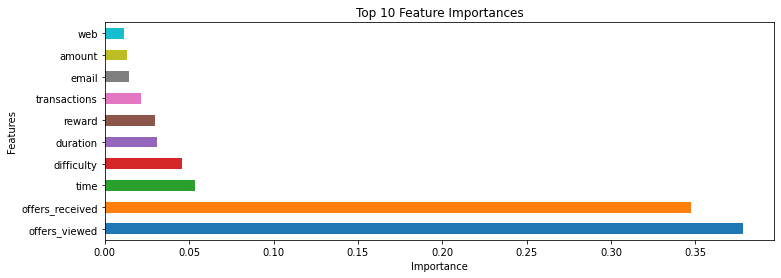

time                   0.053720
amount                 0.012963
transactions           0.021223
offers_received        0.347274
offers_viewed          0.377897
difficulty             0.045849
duration               0.030975
reward                 0.029834
web                    0.011513
email                  0.014047
mobile                 0.004049
social                 0.003342
offer_bogo             0.007182
offer_discount         0.006548
offer_informational    0.007348
age                    0.004154
income                 0.006175
year                   0.007456
month                  0.003770
day                    0.002873
gender_F               0.001235
gender_M               0.000532
gender_O               0.000043
dtype: float64


In [49]:
# Define the models for comparative analysis
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Placeholder for results
results = {}

# Evaluating each model using cross-validation
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1_macro'])
    results[name] = cv_results

# Outputting the results
for name, result in results.items():
    print(f"{name}: Mean Accuracy: {np.mean(result['test_accuracy']):.4f}, Mean F1 Score: {np.mean(result['test_f1_macro']):.4f}")

# Training a Random Forest model for feature importance analysis
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plotting the top 10 feature importances
feature_importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
          
print(feature_importances)

## Comparative Analysis Discussion
**1. Model Performance**: The reported results for Random Forest and Gradient Boosting suggest an unrealistically high performance. On the other hand, Logistic Regression has a lower but more plausible performance metric. This disparity raises questions about the complexity and fit of the models to the dataset.

**2. Feature Importance**: The feature importance plot shows offers_viewed and offers_received as the most significant features. This is a strong indication that the model might be exploiting these features in a way that wouldn't generalize well outside of the dataset at hand.

**3. Potential Data Leakage**: Given the high importance of offers_viewed and offers_received, it is possible that these features are leaking information about the target variable, explaining the perfect scores.

## Customer Segmentation
Perform segmentation using clustering (K-Means) based on demographic and behavioral features.

In [50]:
# Selecting features for segmentation
segmentation_features = data[['age', 'income', 'gender_F', 'gender_M', 'gender_O']]  

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
segments = kmeans.fit_predict(scaled_features)

# Adding segment labels to the DataFrame
final_offer['Segment'] = segments


## Analysis per Offer Type and Segment
Analyze the completion rate of each offer type within each segment to identify responsiveness.

In [51]:
# Analyzing offer completion rates by segment and Bogo offer
offer_completion_rates = final_offer.groupby(['Segment', 'offer_bogo'])['offers_completed'].mean().unstack()

print(offer_completion_rates)

# Analyzing offer completion rates by segment and Discount offer
offer_completion_rates = final_offer.groupby(['Segment', 'offer_discount'])['offers_completed'].mean().unstack()

print(offer_completion_rates)

# Analyzing offer completion rates by segment and Informational offer
offer_completion_rates = final_offer.groupby(['Segment', 'offer_informational'])['offers_completed'].mean().unstack()

print(offer_completion_rates)

offer_bogo       0.0       1.0
Segment                       
0           0.065860  0.052807
1           0.169862  0.177618
2           0.220942  0.271588
3           0.200627  0.268053
4           0.202258  0.239788
offer_discount       0.0       1.0
Segment                           
0               0.036733  0.095426
1               0.128962  0.235443
2               0.202363  0.299265
3               0.192913  0.278261
4               0.177079  0.274655
offer_informational       0.0  1.0
Segment                           
0                    0.073845  0.0
1                    0.206198  0.0
2                    0.285180  0.0
3                    0.273173  0.0
4                    0.257128  0.0


# Summary of Offer Completion Rates by Segment
## BOGO Offers
 - Segment 0 has the lowest BOGO offer completion rate, which decreases slightly when a BOGO offer is available.
 - Segments 2 and 3 show the highest completion rates for BOGO offers, suggesting these segments respond well to BOGO promotions.
 - Segments 1 and 4 also show an increase in completion rate when a BOGO offer is available, although not as pronounced as in Segments 2 and 3.


## Discount Offers
 - Segment 0 shows a significant increase in offer completion rates when a discount is available, indicating that while this segment might not respond well to BOGO offers, they are influenced by discounts.
 - Segment 2 exhibits the highest completion rate for discount offers, indicating a strong preference for discounts over other offer types.
 - Segments 3 and 4 also respond positively to discount offers, with completion rates similar to those for BOGO offers.


## Informational Offers
 - All segments show a 0.0 completion rate for informational offers, suggesting that informational offers do not directly lead to offer completions in the same way that BOGO and discount offers do. This might be due to the nature of informational offers, which aim to inform rather than provide a direct incentive like discounts or BOGOs.

# Observations and Strategy Recommendations
 - **Segmentation Effectiveness**: The segmentation captures distinct preferences among different customer groups. Segments 2 and 3 are particularly responsive to offers, making them prime targets for more aggressive marketing campaigns.

 - **BOGO and Discount Offers**: These offers are effective in driving completions across most segments, with particular effectiveness in Segments 2 and 3. Tailoring offers based on segment responsiveness can improve overall campaign performance.

 - **Informational Offers**: The lack of direct completions from informational offers suggests these might play a more nuanced role in the customer journey, possibly affecting awareness and perception rather than immediate action. They could be used strategically to support other types of offers or to engage customers at different stages of the buying cycle.

 - **Tailored Marketing Strategies**: Given the varied response to offer types across segments, a more tailored approach to marketing could yield better results. For example, focusing on discount offers for Segment 2 and BOGO offers for Segment 3, while using informational offers to enhance brand awareness and complement direct incentives.


This analysis underscores the importance of understanding customer segments' unique preferences and behaviors to optimize marketing strategies and offer designs for higher engagement and completion rates.

## Recommendations for Improvement
**1. Data Quality and Leakage**: Review the dataset for potential data leakage. Ensure that the features used for training do not inadvertently include information from the future (post-outcome knowledge).

**2. Model Complexity**: Simplify the model to prevent overfitting. This can be done by reducing the number of trees or the depth in the Random Forest and Gradient Boosting models or by applying regularization techniques in Logistic Regression.

**3. Validation Strategy**: Implement a more rigorous validation strategy, possibly using a different data split method such as time-based splitting if the data has a temporal component.

**4. External Validation**: Test the model's performance on a completely independent external dataset to validate its ability to generalize.

**5. Feature Engineering**: Re-evaluate the feature engineering process to ensure that it's not unintentionally giving the model an unfair advantage.

**6. Alternative Metrics**: Use additional metrics like the Area Under the Precision-Recall Curve (AUPRC) which can provide a better sense of model performance, especially on imbalanced datasets.

## Steps to ensure Data Quality and Preventing Data Leakage
Data leakage can occur at any stage of data preparation, from feature selection to data normalization. Ensuring data quality and preventing leakage requires careful examination of your data processing steps:   

**1. Review Feature Selection**: Make sure that the features included in your model do not inadvertently include data from the future (post-outcome knowledge) that wouldn't be available at prediction time.  
**2. Examine Data Preprocessing**: Ensure that any data normalization or transformation is fitted only on the training data, and then applied to the test data. This prevents information from the test set leaking into the model training process.  
**3. Temporal Validation**: If your data is time-sensitive, use a time-based split for your train and test sets rather than random splitting. This ensures that the model is validated on future data, simulating how it would perform in production.  

To prevent data leakage, especially in feature engineering and preprocessing steps, ensure that these steps are included within a cross-validation loop or a pipeline, and are applied separately to training and validation/test sets during each fold of the cross-validation.  

This approach ensures that our model's performance metrics are reliable and indicative of how well the model can generalize to unseen data, addressing both potential overfitting and data quality concerns.


# Conclusion
In conclusion, while the models demonstrate exceptionally high performance on the given dataset, the results are suspiciously perfect and may not reflect the models' ability to generalize to new, unseen data. This indicates a need for a more in-depth investigation into data preparation, feature selection, and model evaluation strategies. The project highlights the importance of vigilance against overfitting and data leakage, especially when handling sensitive features closely related to the target variable. Addressing these concerns and implementing the suggested improvements could lead to a more robust and trustworthy model.